# dataset exploration

In [ ]:
# Setup: safe imports and load train/test datasets
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
try:
    import geopandas as gpd
except Exception as e:
    gpd = None
    print(f"geopandas not available ({e}); continuing without it")
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import os
print("Working dir:", os.getcwd())
# Load datasets (paths relative to this notebook's folder)
train_path = os.path.join('..','dataset','train.csv')
test_path = os.path.join('..','dataset','test.csv')
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
print("Loaded train shape:", train_df.shape, "test shape:", test_df.shape)

ModuleNotFoundError: No module named 'geopandas'

In [2]:
df=pd.read_csv('/kaggle/input/american-companies-bankruptcy-prediction-dataset/american_bankruptcy.csv')
df.head()

company_name status_label  year       X1       X2      X3      X4       X5  \
0          C_1        alive  1999  511.267  833.107  18.373  89.031  336.018   
1          C_1        alive  2000  485.856  713.811  18.577  64.367  320.590   
2          C_1        alive  2001  436.656  526.477  22.496  27.207  286.588   
3          C_1        alive  2002  396.412  496.747  27.172  30.745  259.954   
4          C_1        alive  2003  432.204  523.302  26.680  47.491  247.245   

       X6       X7  ...        X9      X10      X11     X12      X13      X14  \
0  35.163  128.348  ...  1024.333  740.998  180.447  70.658  191.226  163.816   
1  18.531  115.187  ...   874.255  701.854  179.987  45.790  160.444  125.392   
2 -58.939   77.528  ...   638.721  710.199  217.699   4.711  112.244  150.464   
3 -12.410   66.322  ...   606.337  686.621  164.658   3.573  109.590  203.575   
4   3.504  104.661  ...   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467  

[5 rows x 21 columns]

In [3]:
df.rename(columns={'X1':'Current assets','X2':'Cost of goods sold','X3':'Depreciation and amortization','X4':'EBITDA','X5':'Inventory','X6':'Net Income','X7':'Total Receivables','X8':'Market value','X9':'Net sales','X10':'Total assets','X11':'Total Long-term debt','X12':'EBIT','X13':'Gross Profit','X14':'Total Current Liabilities','X15':'Retained Earnings','X16':'Total Revenue','X17':'Total Liabilities','X18':'Total Operating Expenses'},inplace=True)

In [5]:
df.head()

company_name status_label  year  Current assets  Cost of goods sold  \
0          C_1        alive  1999         511.267             833.107   
1          C_1        alive  2000         485.856             713.811   
2          C_1        alive  2001         436.656             526.477   
3          C_1        alive  2002         396.412             496.747   
4          C_1        alive  2003         432.204             523.302   

   Depreciation and amortization  EBITDA  Inventory  Net Income  \
0                         18.373  89.031    336.018      35.163   
1                         18.577  64.367    320.590      18.531   
2                         22.496  27.207    286.588     -58.939   
3                         27.172  30.745    259.954     -12.410   
4                         26.680  47.491    247.245       3.504   

   Total Receivables  ...  Net sales  Total assets  Total Long-term debt  \
0            128.348  ...   1024.333       740.998               180.447   
1            115.187  ...    874.255       701.854               179.987   
2             77.528  ...    638.721       710.199               217.699   
3             66.322  ...    606.337       686.621               164.658   
4            104.661  ...    651.958       709.292               248.666   

     EBIT  Gross Profit  Total Current Liabilities  Retained Earnings  \
0  70.658       191.226                    163.816            201.026   
1  45.790       160.444                    125.392            204.065   
2   4.711       112.244                    150.464            139.603   
3   3.573       109.590                    203.575            124.106   
4  20.811       128.656                    131.261            131.884   

   Total Revenue  Total Liabilities  Total Operating Expenses  
0       1024.333            401.483                   935.302  
1        874.255            361.642                   809.888  
2        638.721            399.964                   611.514  
3        606.337            391.633                   575.592  
4        651.958            407.608                   604.467  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market value                   78682 non-null  float64
 11  Net sales                      78682 non-null  float64
 12  Total assets                   78682 non-null 

In [7]:
df.describe().T

count         mean           std  \
year                           78682.0  2007.506317      5.742768   
Current assets                 78682.0   880.362485   3928.564794   
Cost of goods sold             78682.0  1594.529029   8930.484664   
Depreciation and amortization  78682.0   121.234256    652.376804   
EBITDA                         78682.0   376.759424   2012.023142   
Inventory                      78682.0   201.605717   1060.766096   
Net Income                     78682.0   129.382453   1265.532022   
Total Receivables              78682.0   286.832743   1335.978571   
Market value                   78682.0  3414.354610  18414.103647   
Net sales                      78682.0  2364.019706  11950.068842   
Total assets                   78682.0  2867.110620  12917.944421   
Total Long-term debt           78682.0   722.483710   3242.170946   
EBIT                           78682.0   255.525035   1494.643534   
Gross Profit                   78682.0   769.490783   3774.703114   
Total Current Liabilities      78682.0   610.072255   2938.387443   
Retained Earnings              78682.0   532.467069   6369.159440   
Total Revenue                  78682.0  2364.019706  11950.068842   
Total Liabilities              78682.0  1773.563963   8053.684902   
Total Operating Expenses       78682.0  1987.260307  10419.629038   

                                       min         25%         50%  \
year                             1999.0000  2002.00000  2007.00000   
Current assets                     -7.7600    18.92400   100.44950   
Cost of goods sold               -366.6450    17.03825   103.66100   
Depreciation and amortization       0.0000     1.19200     7.92950   
EBITDA                         -21913.0000    -0.81100    15.03450   
Inventory                           0.0000     0.00000     7.02300   
Net Income                     -98696.0000    -7.41575     1.61600   
Total Receivables                  -0.0060     3.28125    22.82000   
Market value                        0.0001    34.98000   227.51185   
Net sales                       -1964.9990    27.54850   186.59850   
Total assets                        0.0010    37.36350   213.20350   
Total Long-term debt               -0.0230     0.00000     7.59350   
EBIT                           -25913.0000    -2.78700     6.51800   
Gross Profit                   -21536.0000     8.52125    63.58150   
Total Current Liabilities           0.0010     8.88925    43.33300   
Retained Earnings             -102362.0000   -68.28275    -1.13100   
Total Revenue                   -1964.9990    27.54850   186.59850   
Total Liabilities                   0.0010    13.48600    81.98800   
Total Operating Expenses         -317.1970    32.87250   168.91200   

                                      75%         max  
year                           2012.00000     2018.00  
Current assets                  431.52675   169662.00  
Cost of goods sold              634.54800   374623.00  
Depreciation and amortization    47.97175    28430.00  
EBITDA                          139.65525    81730.00  
Inventory                        74.74725    62567.00  
Net Income                       40.14425   104821.00  
Total Receivables               131.58050    65812.00  
Market value                   1244.88995  1073390.54  
Net sales                      1046.40250   511729.00  
Total assets                   1171.36475   531864.00  
Total Long-term debt            248.76075   166250.00  
EBIT                             87.59900    71230.00  
Gross Profit                    344.07425   137106.00  
Total Current Liabilities       222.81700   116866.00  
Retained Earnings               146.07000   402089.00  
Total Revenue                  1046.40250   511729.00  
Total Liabilities               629.97500   337980.00  
Total Operating Expenses        875.52225   481580.00

In [8]:
df.describe(include='object')

company_name status_label
count         78682        78682
unique         8971            2
top          C_4081        alive
freq             20        73462

In [9]:
df.isnull().sum()

company_name                     0
status_label                     0
year                             0
Current assets                   0
Cost of goods sold               0
Depreciation and amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market value                     0
Net sales                        0
Total assets                     0
Total Long-term debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [ ]:
sns.pairplot(data=df,hue='status_label',kind='scatter')

In [12]:
df['status_label'].unique()

array(['alive', 'failed'], dtype=object)

In [8]:
df_numeric=df.copy()
df_numeric.drop(columns=['company_name'],inplace=True)

In [9]:
def binaryclass(row):
    if row['status_label'] == 'alive':
        return(1)
    else:
        return(0)
df_numeric['status_label']=df.apply(binaryclass,axis=1)
df_numeric.head()

status_label  year  Current assets  Cost of goods sold  \
0             1  1999         511.267             833.107   
1             1  2000         485.856             713.811   
2             1  2001         436.656             526.477   
3             1  2002         396.412             496.747   
4             1  2003         432.204             523.302   

   Depreciation and amortization  EBITDA  Inventory  Net Income  \
0                         18.373  89.031    336.018      35.163   
1                         18.577  64.367    320.590      18.531   
2                         22.496  27.207    286.588     -58.939   
3                         27.172  30.745    259.954     -12.410   
4                         26.680  47.491    247.245       3.504   

   Total Receivables  Market value  Net sales  Total assets  \
0            128.348      372.7519   1024.333       740.998   
1            115.187      377.1180    874.255       701.854   
2             77.528      364.5928    638.721       710.199   
3             66.322      143.3295    606.337       686.621   
4            104.661      308.9071    651.958       709.292   

   Total Long-term debt    EBIT  Gross Profit  Total Current Liabilities  \
0               180.447  70.658       191.226                    163.816   
1               179.987  45.790       160.444                    125.392   
2               217.699   4.711       112.244                    150.464   
3               164.658   3.573       109.590                    203.575   
4               248.666  20.811       128.656                    131.261   

   Retained Earnings  Total Revenue  Total Liabilities  \
0            201.026       1024.333            401.483   
1            204.065        874.255            361.642   
2            139.603        638.721            399.964   
3            124.106        606.337            391.633   
4            131.884        651.958            407.608   

   Total Operating Expenses  
0                   935.302  
1                   809.888  
2                   611.514  
3                   575.592  
4                   604.467

# EDA

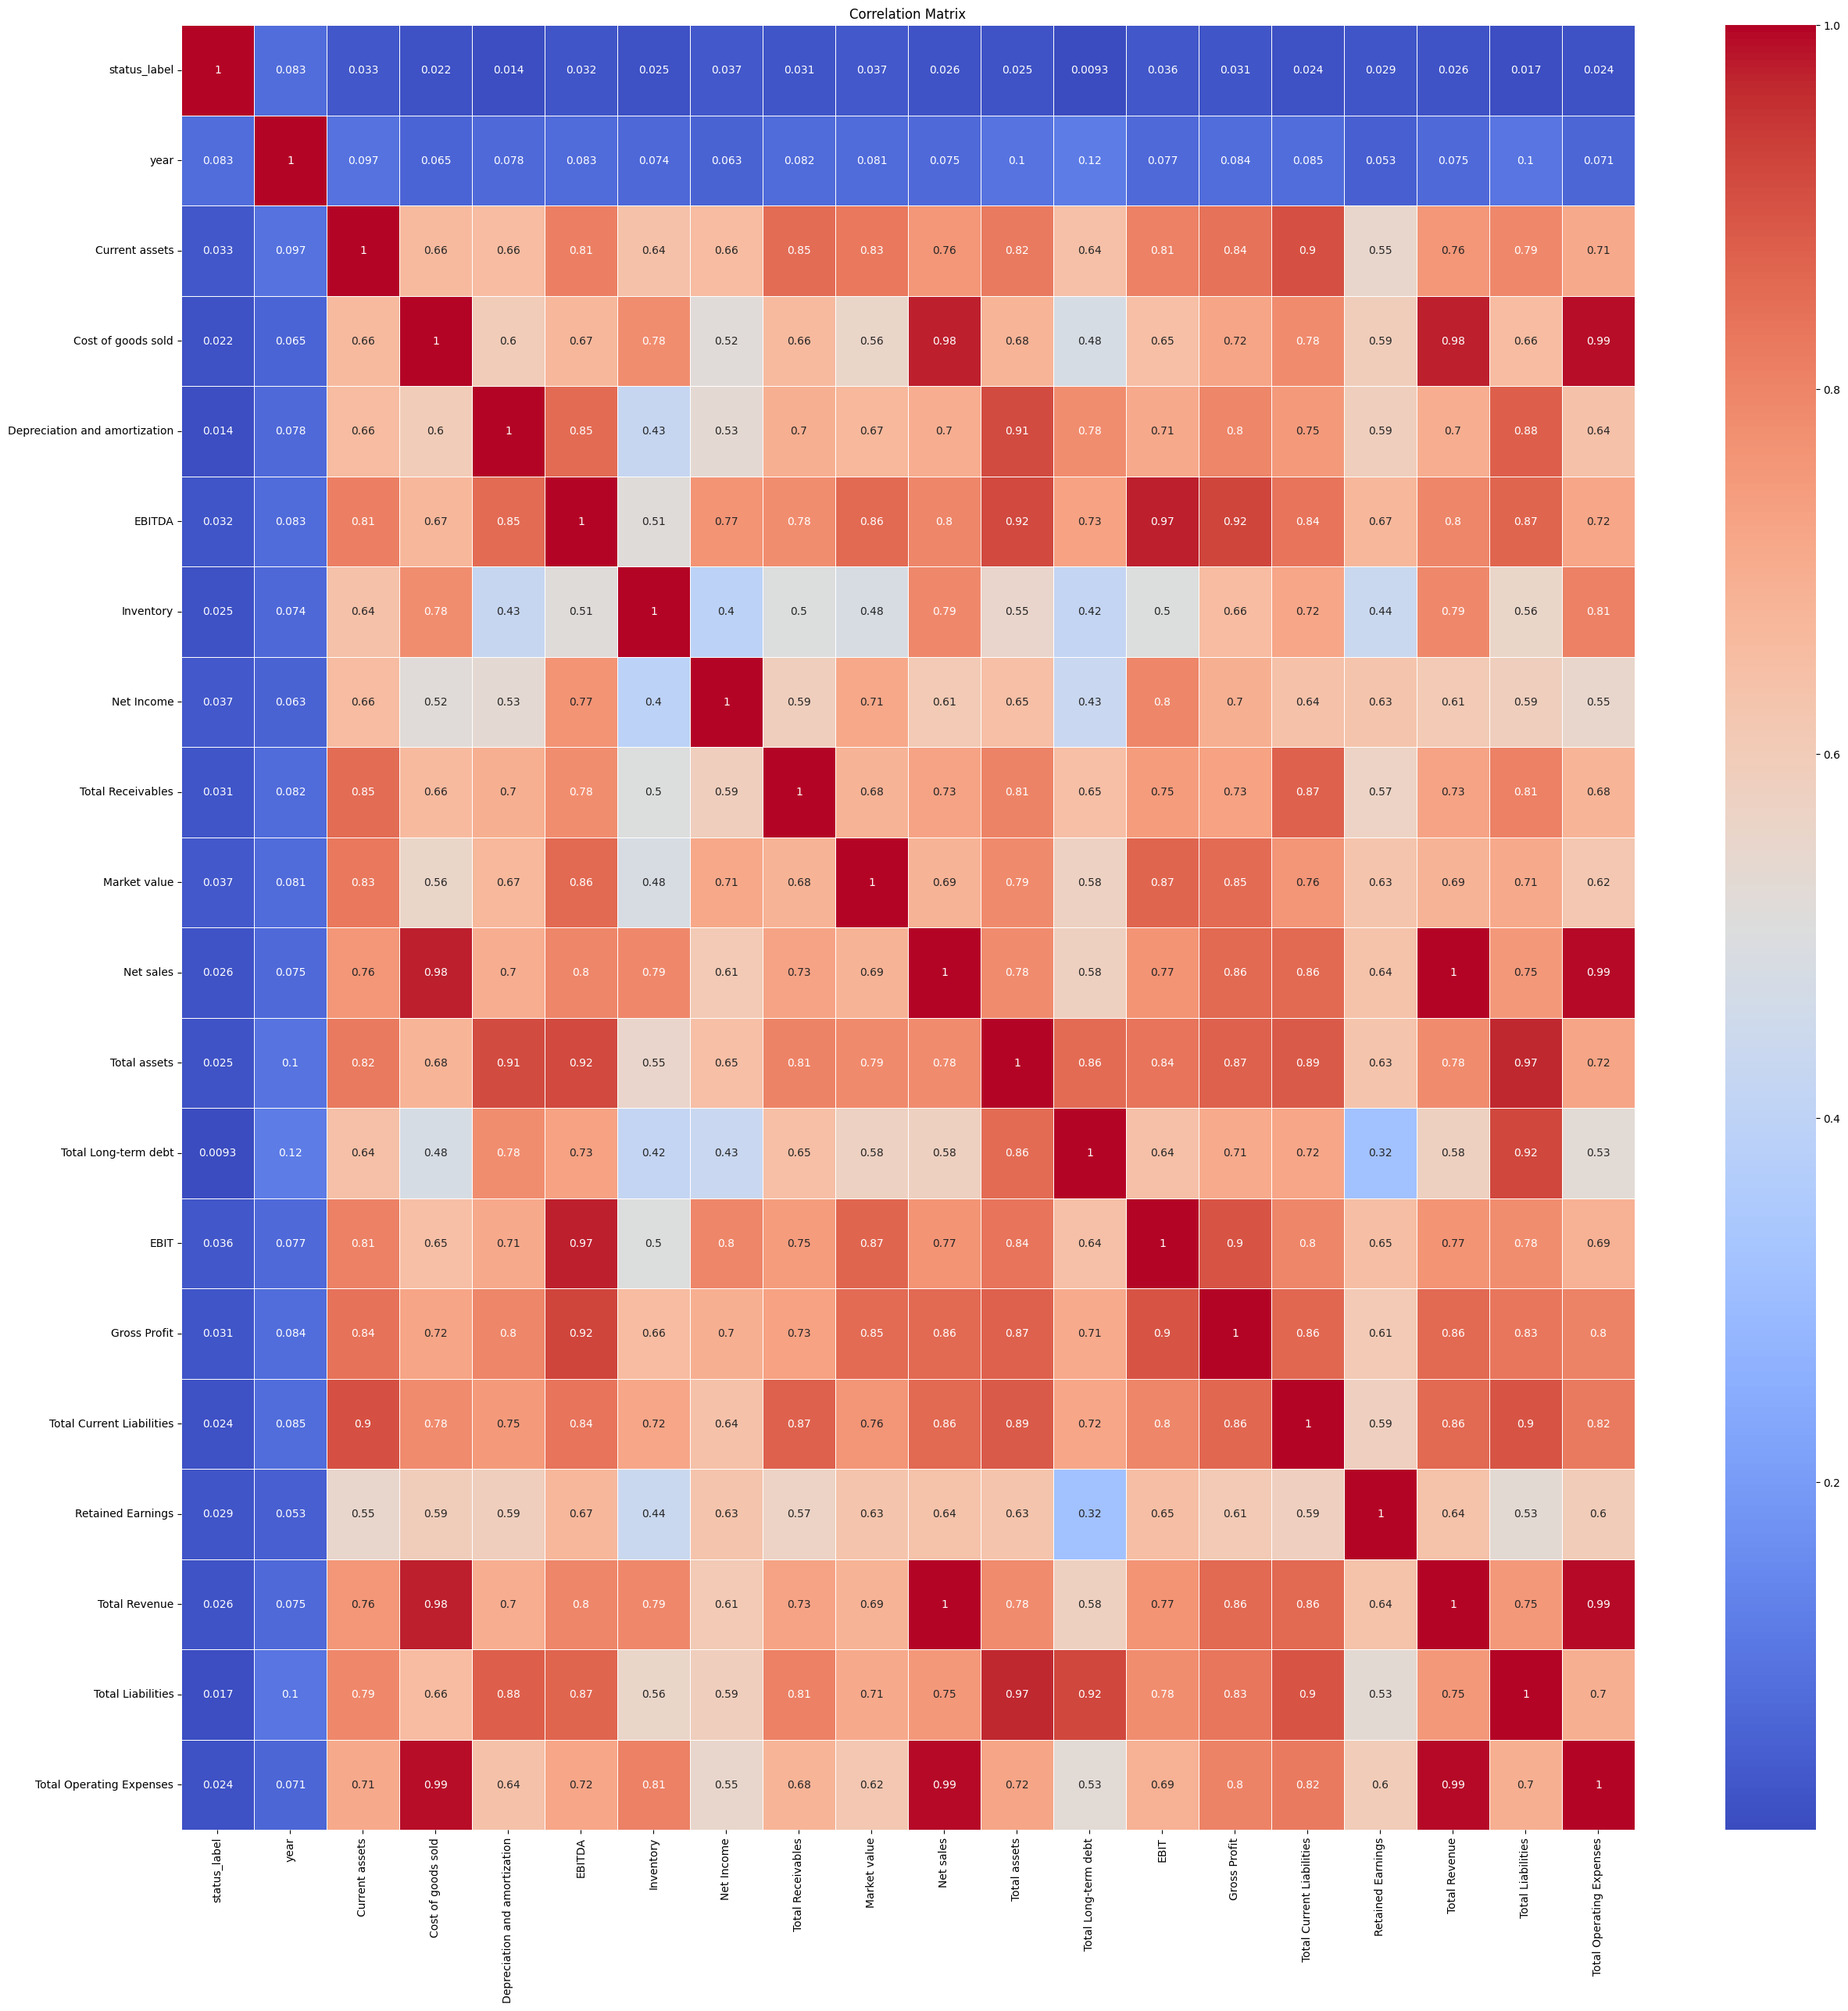

In [15]:
plt.figure(figsize=(30,30))
corr = df_numeric.corr()


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5)
 
plt.title('Correlation Matrix')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0) 

plt.show()

<Axes: xlabel='year'>

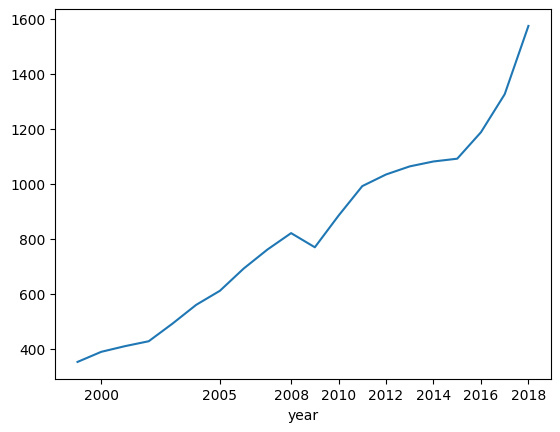

In [16]:
xtick_positions = [2000,2005,2008,2010, 2012, 2014, 2016, 2018]
# xtick_labels = [2'2010', '2012', '2014', '2016', '2018']

# Set xticks with positions and labels
plt.xticks(xtick_positions)
df_numeric.groupby(['year'])['Gross Profit'].mean().plot()

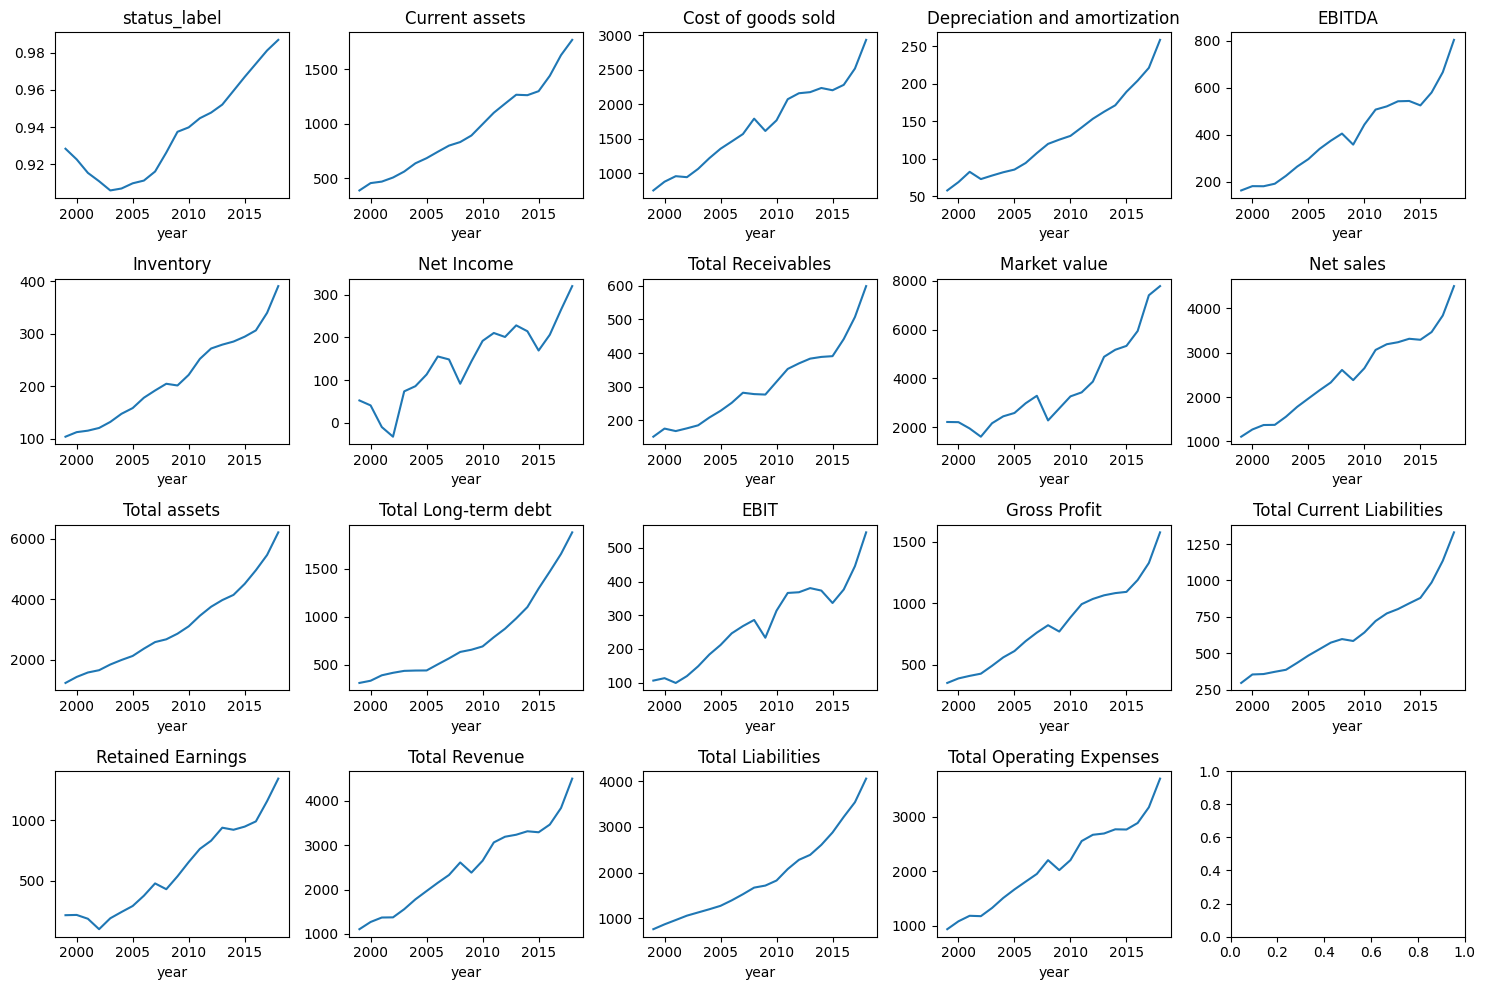

In [17]:
# Calculate mean by year for all numeric features
df_means = df_numeric.groupby('year').mean()

# Get number of rows and columns for subplots based on feature count
n_features = len(df_means.columns)
n_rows = (n_features // 5) + 1  # Assuming 5 features per row (adjust as needed)
n_cols = min(5, n_features)  # Maximum 5 columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as desired


# Loop through features and plot on subplots
feature_index = 0
for row in range(n_rows):
  for col in range(n_cols):
    if feature_index >= n_features:
      break  # No more features, exit loop
    feature_name = df_means.columns[feature_index]
    df_means[feature_name].plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(feature_name)
    feature_index += 1

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

## decrease in all revenues in 2009
* 2007-2008: The housing bubble in the US began to burst, leading to defaults on mortgages and losses for financial institutions. This triggered a domino effect, causing a credit freeze and a decline in overall economic activity.
* 2008: The crisis reached its peak, with major financial institutions facing collapse and government intervention needed to stabilize the financial system.
* 2009 and beyond: The recession officially began in December 2007 (according to the National Bureau of Economic Research) and continued through much of 2009. The effects of the crisis, including decreased consumer spending and business investment, were felt throughout this period and even in later years.
### Therefore, it's very likely that the profit deficits observed for the year 2009 are a consequence of the 2008 financial crisis. The crisis had a significant impact on businesses across various sectors, leading to decreased sales, increased expenses, and ultimately, losses in many cases.




## The Treasury recently reported that the federal government recorded a total budget deficit of \\$1.4 trillion in fiscal year 2009, about \\$960 billion more than the deficit incurred in 2008. CBO notes, in its latest Monthly Budget Review, that the federal deficit rose as a share of the nations gross domestic product (GDP) from 3.1 percent in 2008 to 9.9 percent in 2009the highest deficit as a share of GDP since 1945.
[www.cbo.gov/publication/24992](https://)

<Axes: xlabel='company_name'>

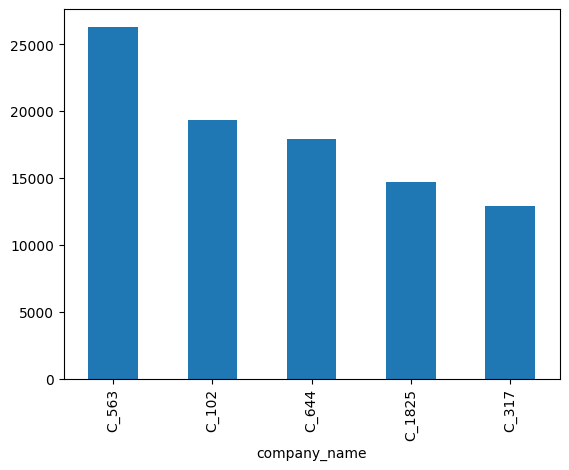

In [18]:
df.groupby(['company_name'])['Net Income'].mean().sort_values(ascending=False).head().plot(kind='bar')

<Axes: xlabel='company_name'>

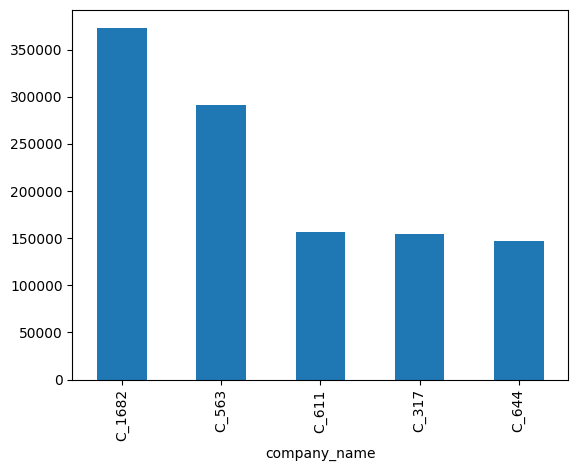

In [19]:
df.groupby(['company_name'])['Total Revenue'].mean().sort_values(ascending=False).head().plot(kind='bar')

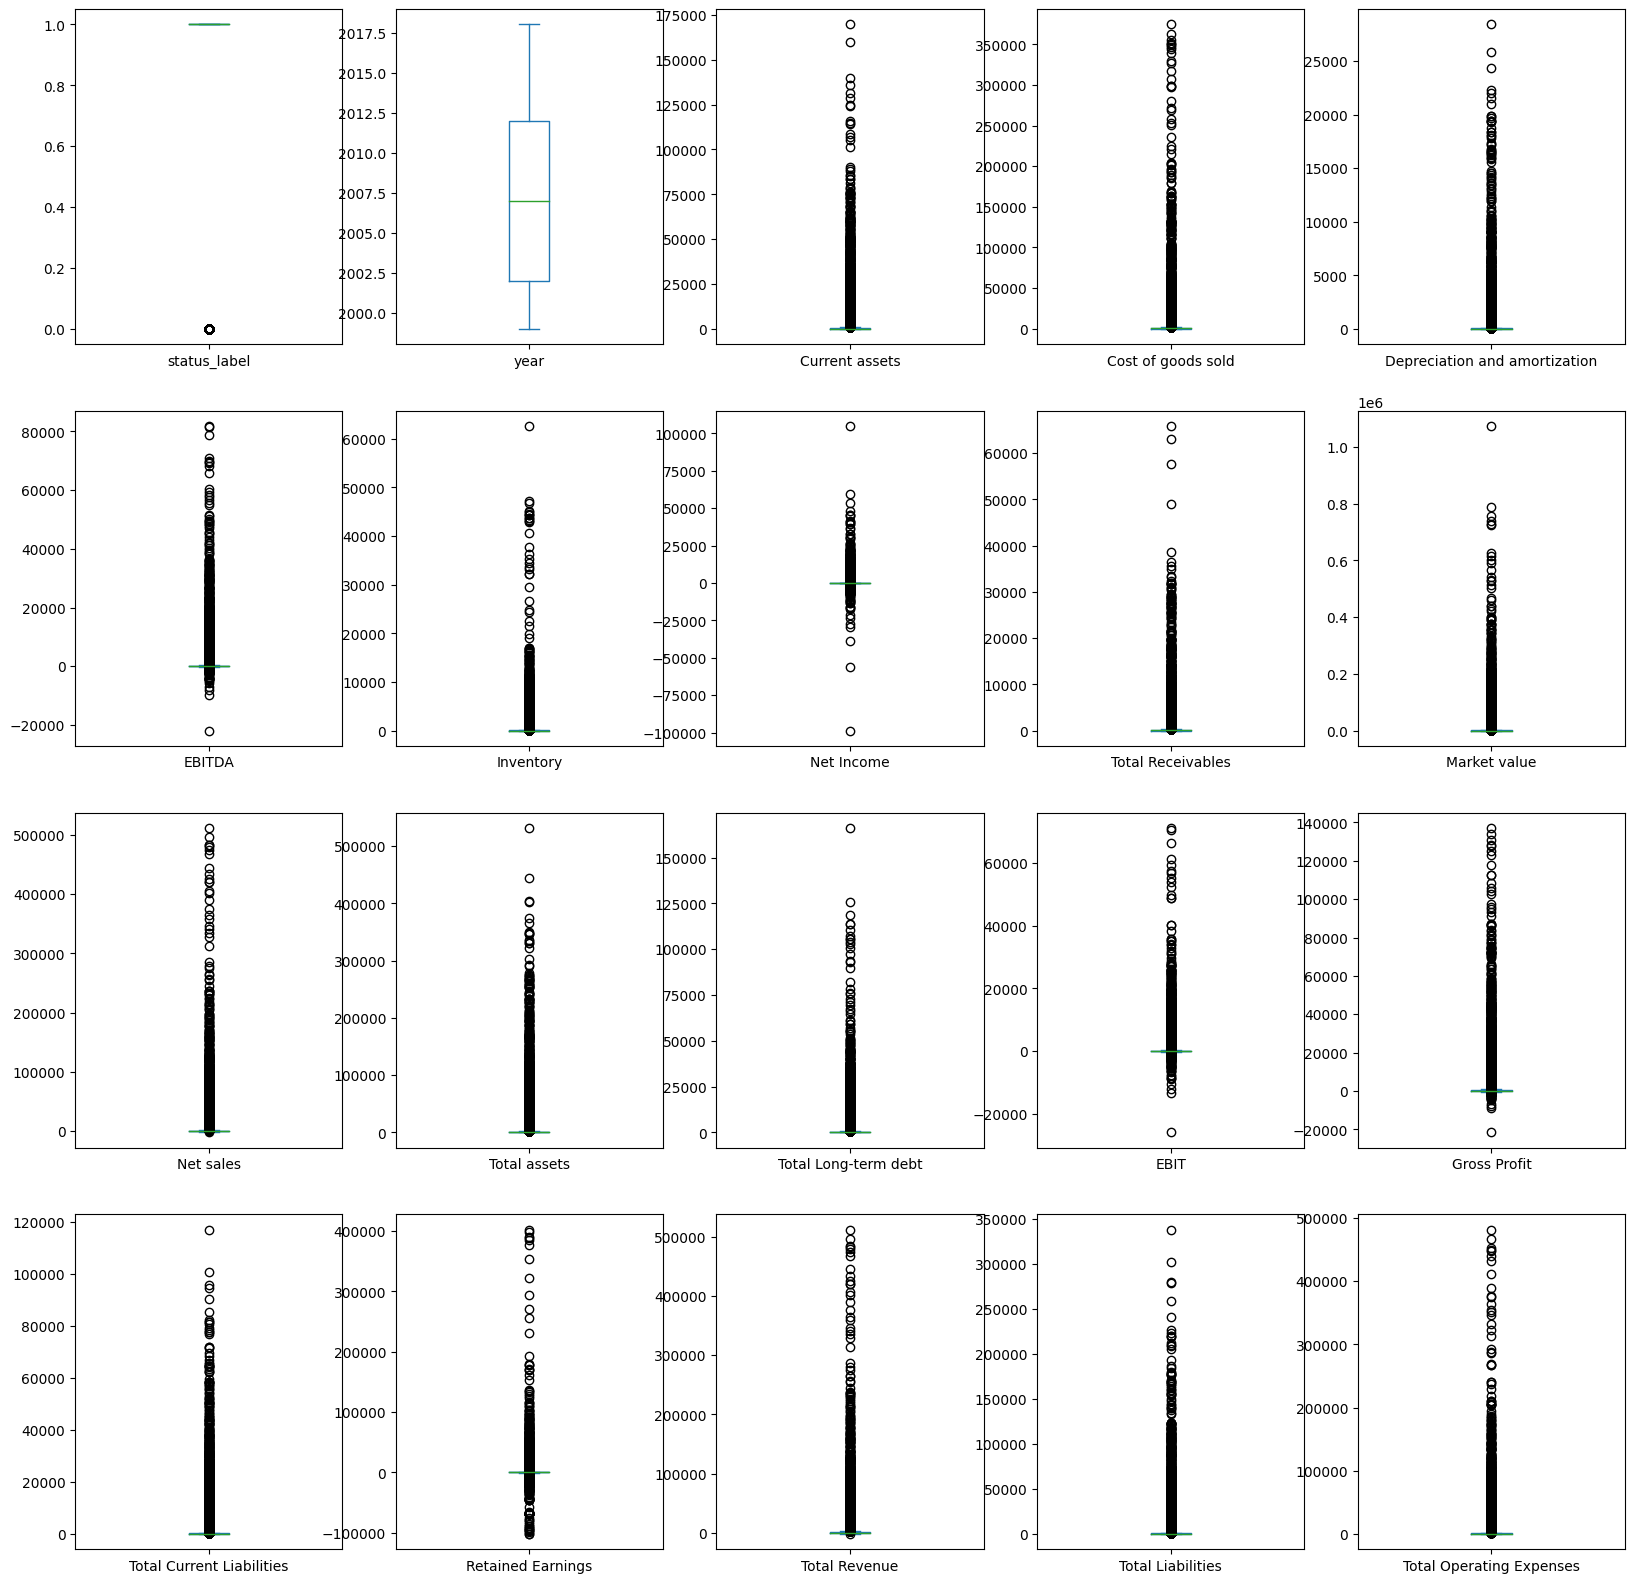

In [21]:
df_numeric.plot(kind = "box" , subplots = True , figsize = (20,20) , layout = (4,5))
plt.show()

* We have a lot of outliers.
* Outliers will not be removed, because when I did so, there were no bankrupt companies left in the database. So I preferred to keep all the data, considering that in the outliers there could be important information of 1 (bankruptcy).

TypeError: FigureBase.colorbar() missing 1 required positional argument: 'mappable'

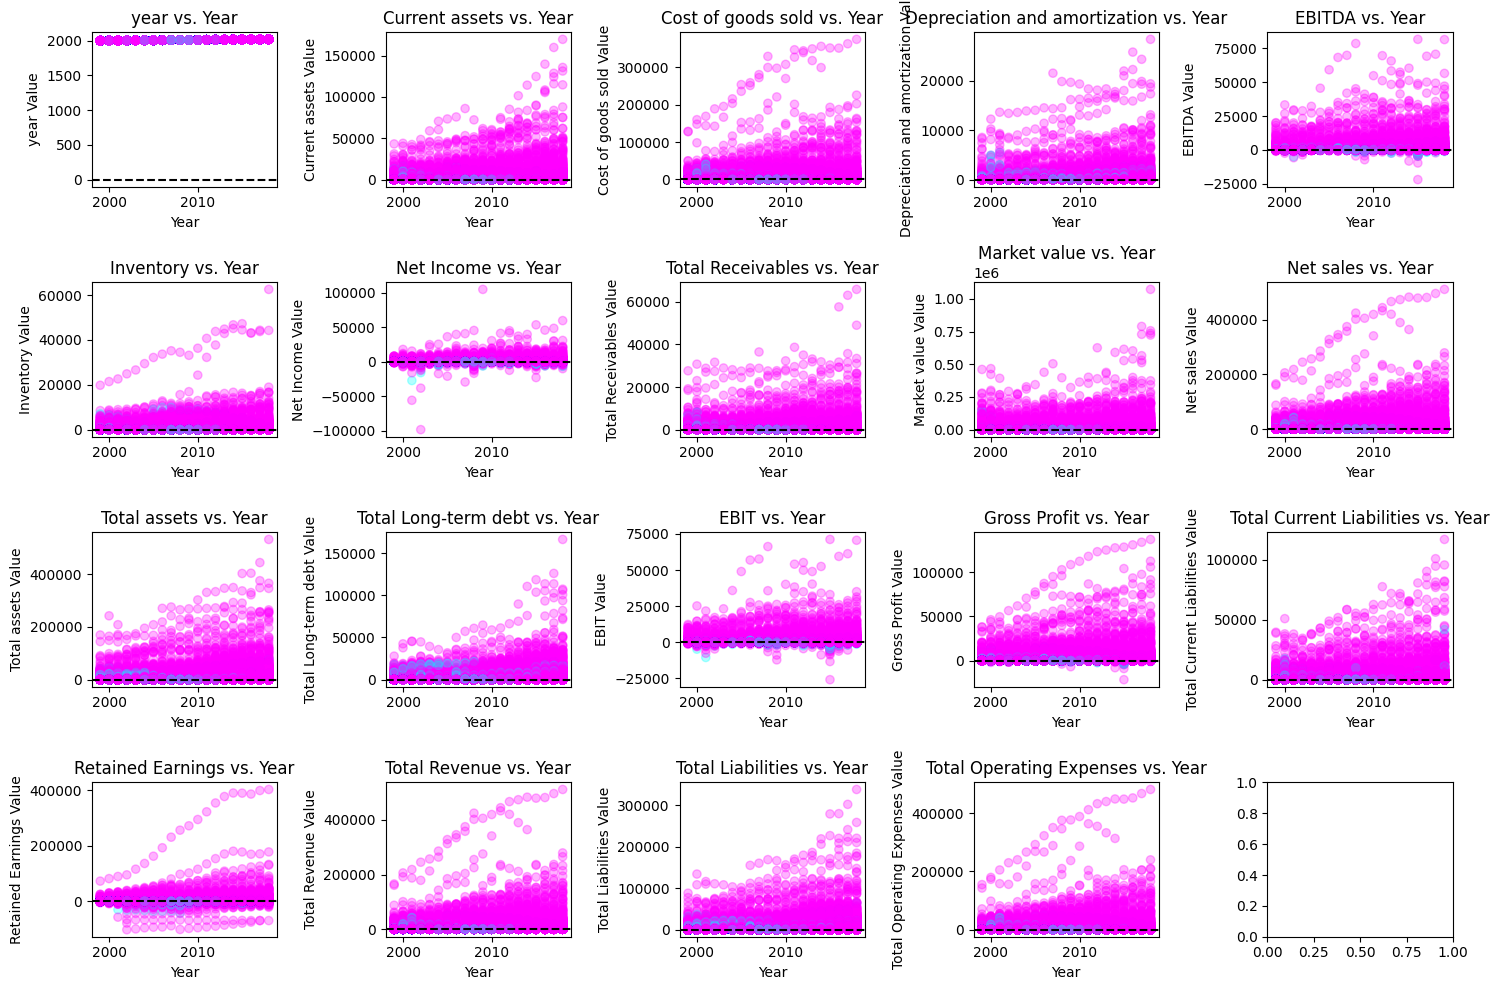

In [22]:
# Select all numerical features (replace 'numeric_features' with your actual list if needed)
numeric_features = [col for col in df.columns if df[col].dtype != object]

# Define number of rows and columns for the subplot grid (adjust based on your number of features)
n_rows = 4  # Adjust as needed
n_cols = 5  # Adjust as needed

# Create a figure and subplots using plt.subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Iterate through features and create scatter plots on subplots
feature_count = 0
for i in range(n_rows):
    for j in range(n_cols):
        if feature_count >= len(numeric_features):
            break  # No more features to plot, exit loop

        # Access the current subplot using axes[i, j]
        ax = axes[i, j]

        # Scatter plot on current subplot
        ax.scatter(df['year'], df[numeric_features[feature_count]], c=df_numeric['status_label'], cmap='cool', alpha=0.3)

        # Add horizontal line at y=0
        ax.axhline(0, c='black', ls='--')

        # Feature label and title (optional)
        ax.set_xlabel('Year')
        ax.set_ylabel(numeric_features[feature_count] + ' Value')
        ax.set_title(numeric_features[feature_count] + ' vs. Year')

        feature_count += 1

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Colorbar for status_label (optional, position outside subplots)
# You can adjust the position using fig.colorbar(...,の位置)
fig.colorbar(label='Status Label', ax=axes.ravel())

# Show the plot
plt.show()

# preprocessing

In [6]:
df2 = df[df.groupby(['company_name'])['status_label'].transform('nunique') > 1]
df2

Empty DataFrame
Columns: [company_name, status_label, year, Current assets, Cost of goods sold, Depreciation and amortization, EBITDA, Inventory, Net Income, Total Receivables, Market value, Net sales, Total assets, Total Long-term debt, EBIT, Gross Profit, Total Current Liabilities, Retained Earnings, Total Revenue, Total Liabilities, Total Operating Expenses]
Index: []

[0 rows x 21 columns]

## there are no companies with the same name that changed status
### i.e alive companies that turned bankrupt or bankrupt companies that started working

In [24]:
df['company_name'].value_counts().count()

8971

## number of actual companies

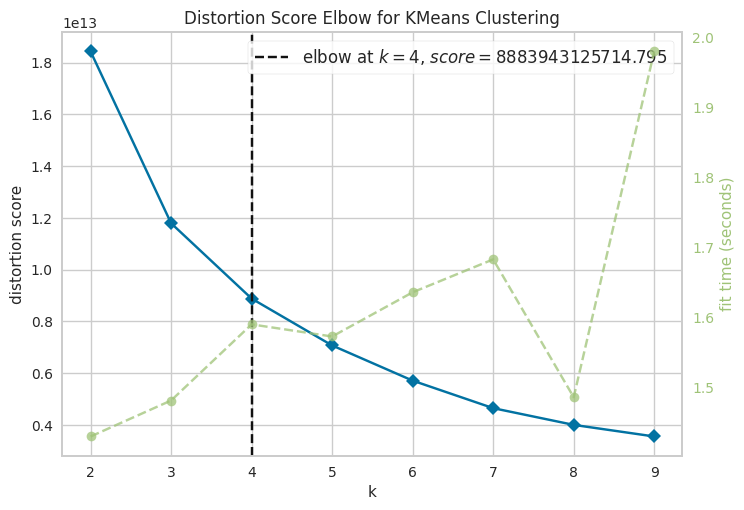

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
features = ['Net Income', 'Market value', 'Total Revenue']
X = df[features].values

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

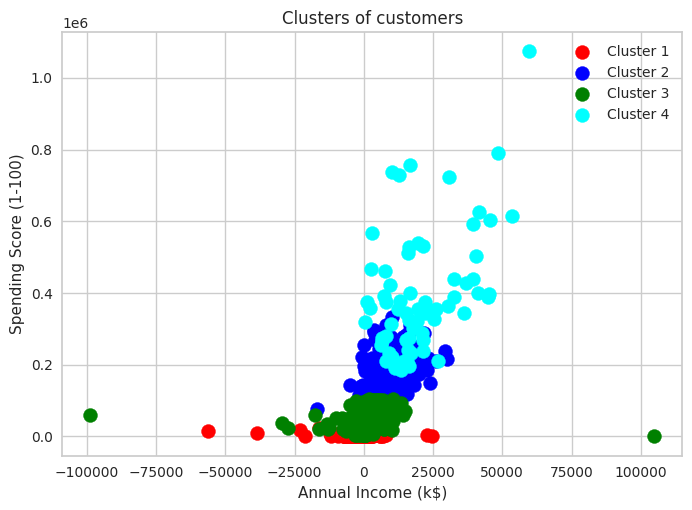

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0,0 ], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1 ,0], X[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2 ,0], X[y_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [30]:
import plotly.graph_objects as go
Scene = dict(xaxis = dict(title  = 'Net Income -->'),yaxis = dict(title  = 'Market Value--->'),zaxis = dict(title  = 'Total Revenue-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

### tried clustering

<Axes: >

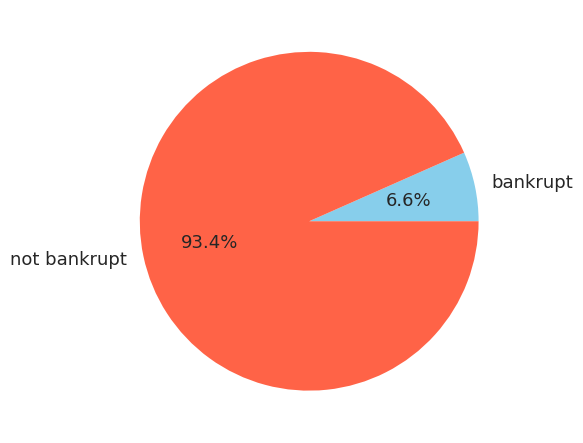

In [36]:
df_numeric.groupby('status_label').size().plot(kind='pie',
                                       autopct='%.1f%%',
                                       fontsize=13,
                                                labels=['bankrupt','not bankrupt'],
                                       colors=['skyblue', 'tomato'])

In [37]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(df_numeric.drop('status_label', axis=1,inplace=False), df_numeric['status_label'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<Axes: >

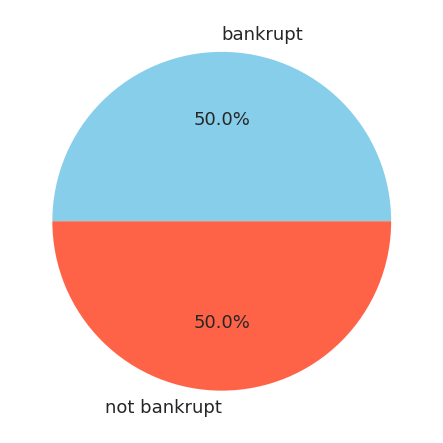

In [38]:
oversampled.groupby('status_label').size().plot(kind='pie',
                                       autopct='%.1f%%',
                                       fontsize=13,
                                                labels=['bankrupt','not bankrupt'],
                                       colors=['skyblue', 'tomato'])

In [46]:
 df.status_label.value_counts()

status_label
alive     73462
failed     5220
Name: count, dtype: int64

In [4]:
df2=df.groupby('company_name').agg({'status_label': 'first'})

In [5]:
df2.status_label.value_counts()

status_label
alive     8362
failed     609
Name: count, dtype: int64

In [6]:
# Filter for failed companies (status_label=0)
failed_companies = df[df['status_label'] == 'failed']

# Remove duplicates for alive companies (status_label=1) based on company_name only
alive_companies = df[df['status_label'] == 'alive'].drop_duplicates(subset='company_name')

# Combine alive and unique failed companies
all_companies = pd.concat([alive_companies, failed_companies], ignore_index=True)

# Print the resulting DataFrame
all_companies.status_label.value_counts()

status_label
alive     8362
failed    5220
Name: count, dtype: int64

In [10]:
all_companies['status_label']=all_companies.apply(binaryclass,axis=1)

In [11]:
all_companies.head()

company_name  status_label  year  Current assets  Cost of goods sold  \
0          C_1             1  1999         511.267             833.107   
1          C_2             1  1999        1029.438             930.142   
2          C_3             1  1999           9.757              19.796   
3          C_4             1  1999         381.872             366.683   
4          C_5             1  1999          28.957              79.567   

   Depreciation and amortization   EBITDA  Inventory  Net Income  \
0                         18.373   89.031    336.018      35.163   
1                        102.090  413.739    243.882      87.635   
2                          0.667   -0.265      5.494      -2.207   
3                         25.633  123.160    161.033      36.972   
4                          2.024    3.873     10.947      -0.138   

   Total Receivables  ...  Net sales  Total assets  Total Long-term debt  \
0            128.348  ...   1024.333       740.998               180.447   
1            436.751  ...   1926.947      1672.529                11.024   
2              3.924  ...     29.370        13.986                 5.974   
3            189.261  ...    732.443      1160.266               591.784   
4             15.890  ...    107.310        42.210                 0.591   

      EBIT  Gross Profit  Total Current Liabilities  Retained Earnings  \
0   70.658       191.226                    163.816            201.026   
1  311.649       996.805                    412.954            827.489   
2   -0.932         9.574                      2.804             -6.375   
3   97.527       365.760                    164.276             54.359   
4    1.849        27.743                     39.835            -33.199   

   Total Revenue  Total Liabilities  Total Operating Expenses  
0       1024.333            401.483                   935.302  
1       1926.947            423.978                  1513.208  
2         29.370              8.778                    29.635  
3        732.443            808.333                   609.283  
4        107.310             52.453                   103.437  

[5 rows x 21 columns]

<Axes: >

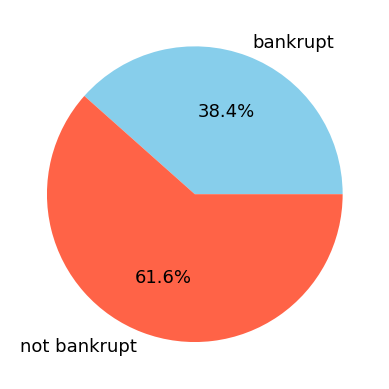

In [12]:
all_companies.groupby('status_label').size().plot(kind='pie',
                                       autopct='%.1f%%',
                                       fontsize=13,
                                                labels=['bankrupt','not bankrupt'],
                                       colors=['skyblue', 'tomato'])

In [ ]:
sns.pairplot(data=all_companies,hue='status_label',kind='scatter')

TypeError: FigureBase.colorbar() missing 1 required positional argument: 'mappable'

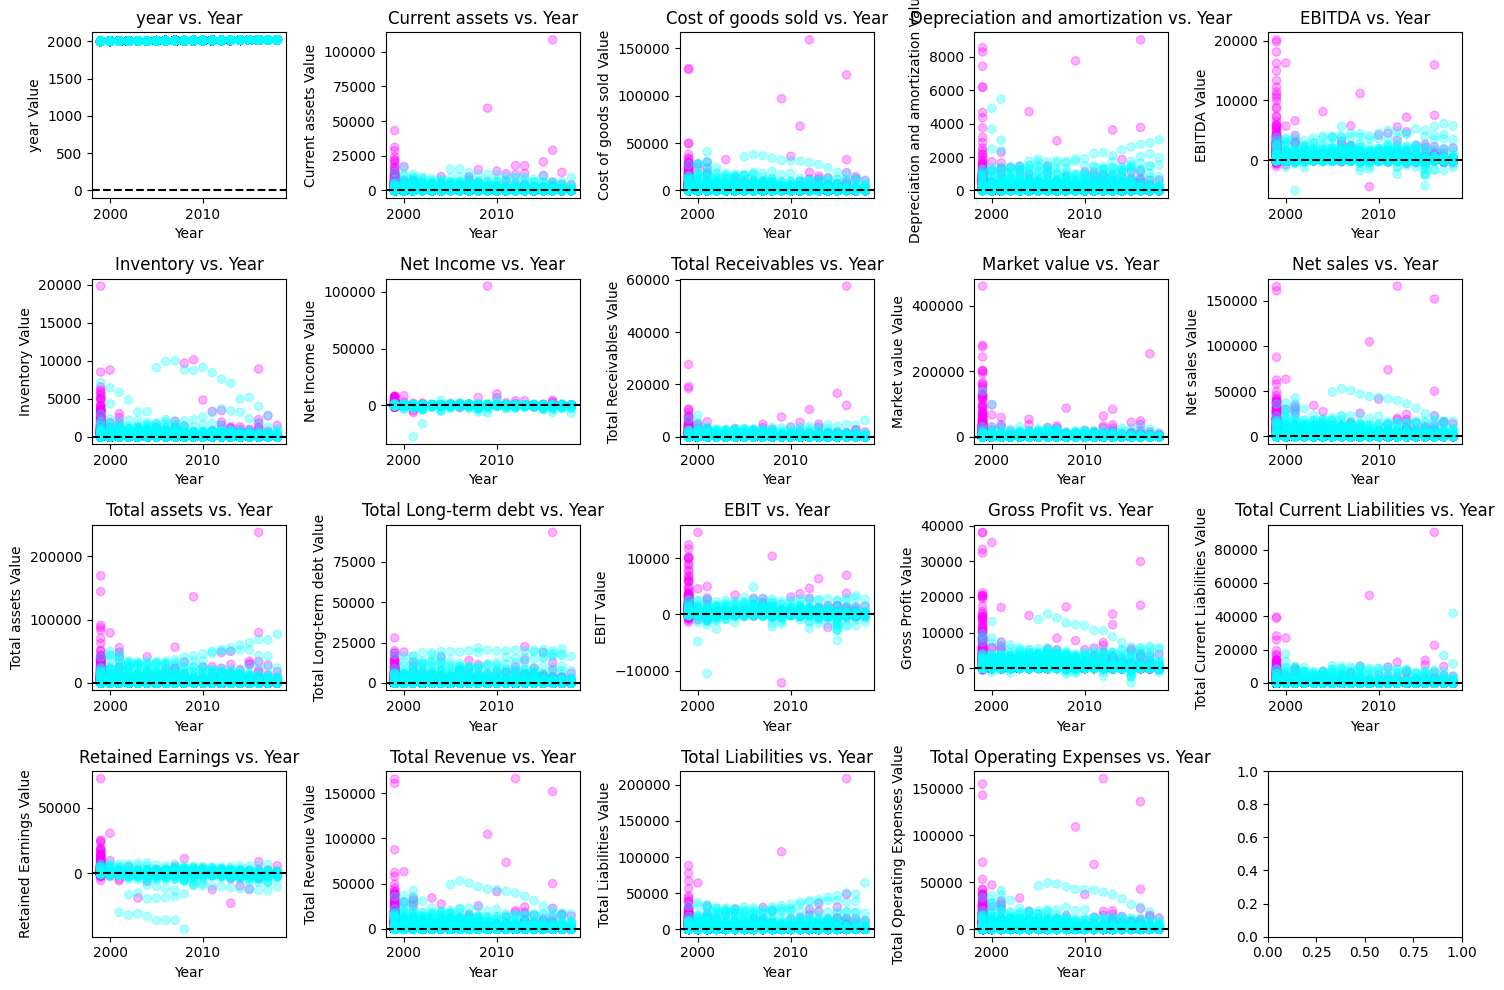

In [13]:
# Select all numerical features (replace 'numeric_features' with your actual list if needed)
numeric_features = [col for col in all_companies.columns if df[col].dtype != object]

# Define number of rows and columns for the subplot grid (adjust based on your number of features)
n_rows = 4  # Adjust as needed
n_cols = 5  # Adjust as needed

# Create a figure and subplots using plt.subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Iterate through features and create scatter plots on subplots
feature_count = 0
for i in range(n_rows):
    for j in range(n_cols):
        if feature_count >= len(numeric_features):
            break  # No more features to plot, exit loop

        # Access the current subplot using axes[i, j]
        ax = axes[i, j]

        # Scatter plot on current subplot
        ax.scatter(all_companies['year'], all_companies[numeric_features[feature_count]], c=all_companies['status_label'], cmap='cool', alpha=0.3)

        # Add horizontal line at y=0
        ax.axhline(0, c='black', ls='--')

        # Feature label and title (optional)
        ax.set_xlabel('Year')
        ax.set_ylabel(numeric_features[feature_count] + ' Value')
        ax.set_title(numeric_features[feature_count] + ' vs. Year')

        feature_count += 1

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Colorbar for status_label (optional, position outside subplots)
# You can adjust the position using fig.colorbar(...,の位置)
fig.colorbar(label='Status Label', ax=axes.ravel())

# Show the plot
plt.show()

In [11]:
all_companies.drop(columns=['company_name'],inplace=True)

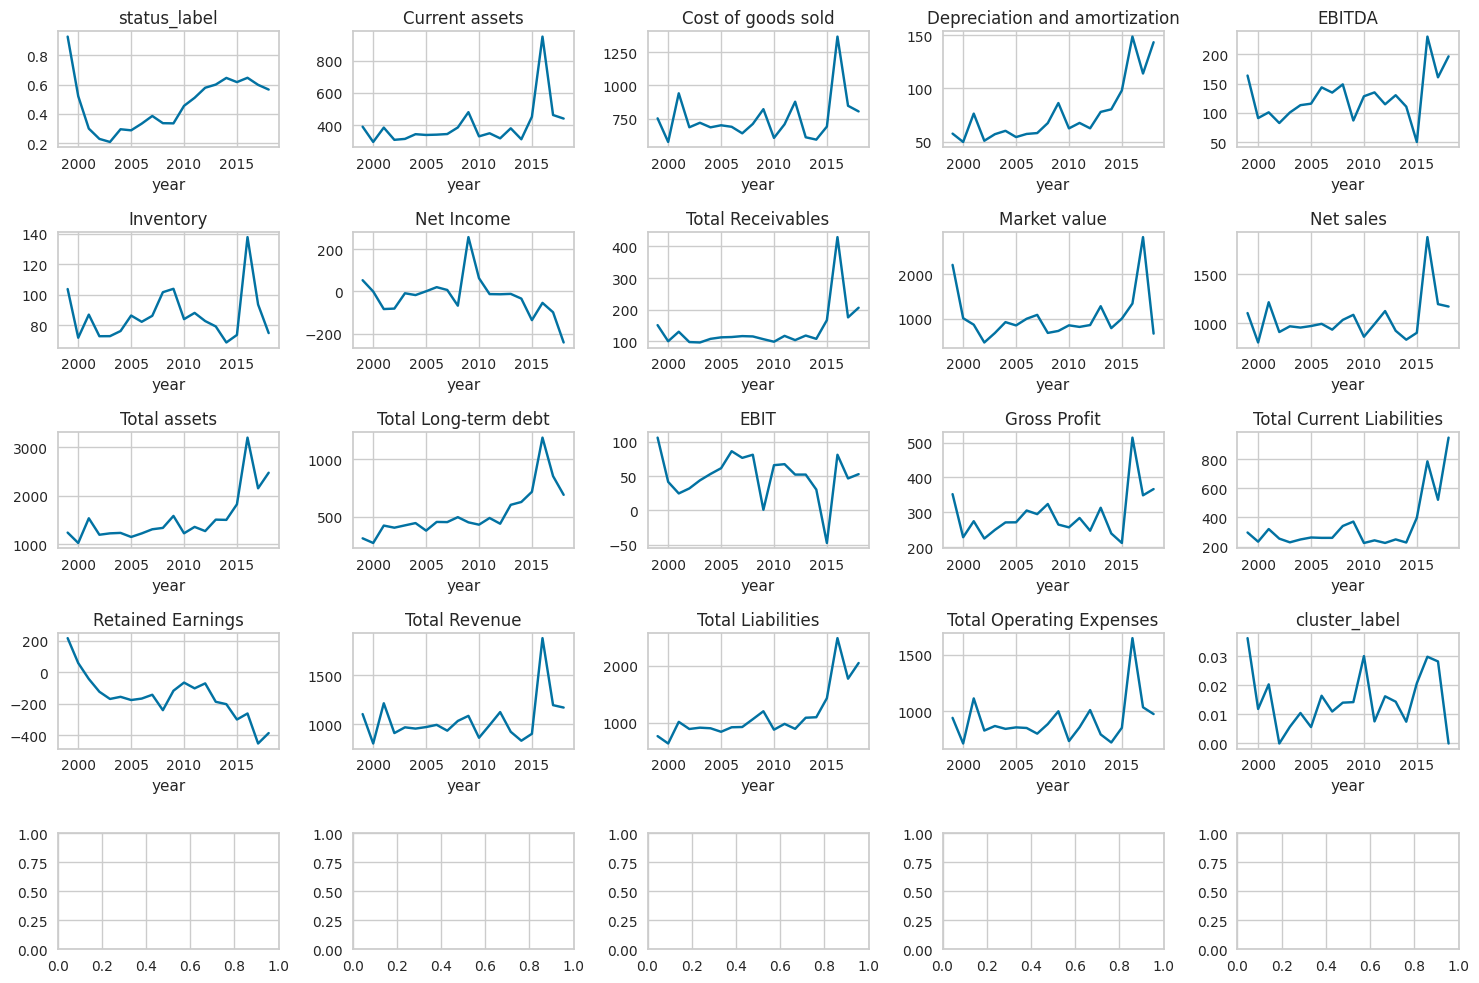

In [72]:
# Calculate mean by year for all numeric features
df_means = all_companies.groupby('year').mean()

# Get number of rows and columns for subplots based on feature count
n_features = len(df_means.columns)
n_rows = (n_features // 5) + 1  # Assuming 5 features per row (adjust as needed)
n_cols = min(5, n_features)  # Maximum 5 columns per row

# Create the figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as desired


# Loop through features and plot on subplots
feature_index = 0
for row in range(n_rows):
  for col in range(n_cols):
    if feature_index >= n_features:
      break  # No more features, exit loop
    feature_name = df_means.columns[feature_index]
    df_means[feature_name].plot(kind='line', ax=axes[row, col])
    axes[row, col].set_title(feature_name)
    feature_index += 1

# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

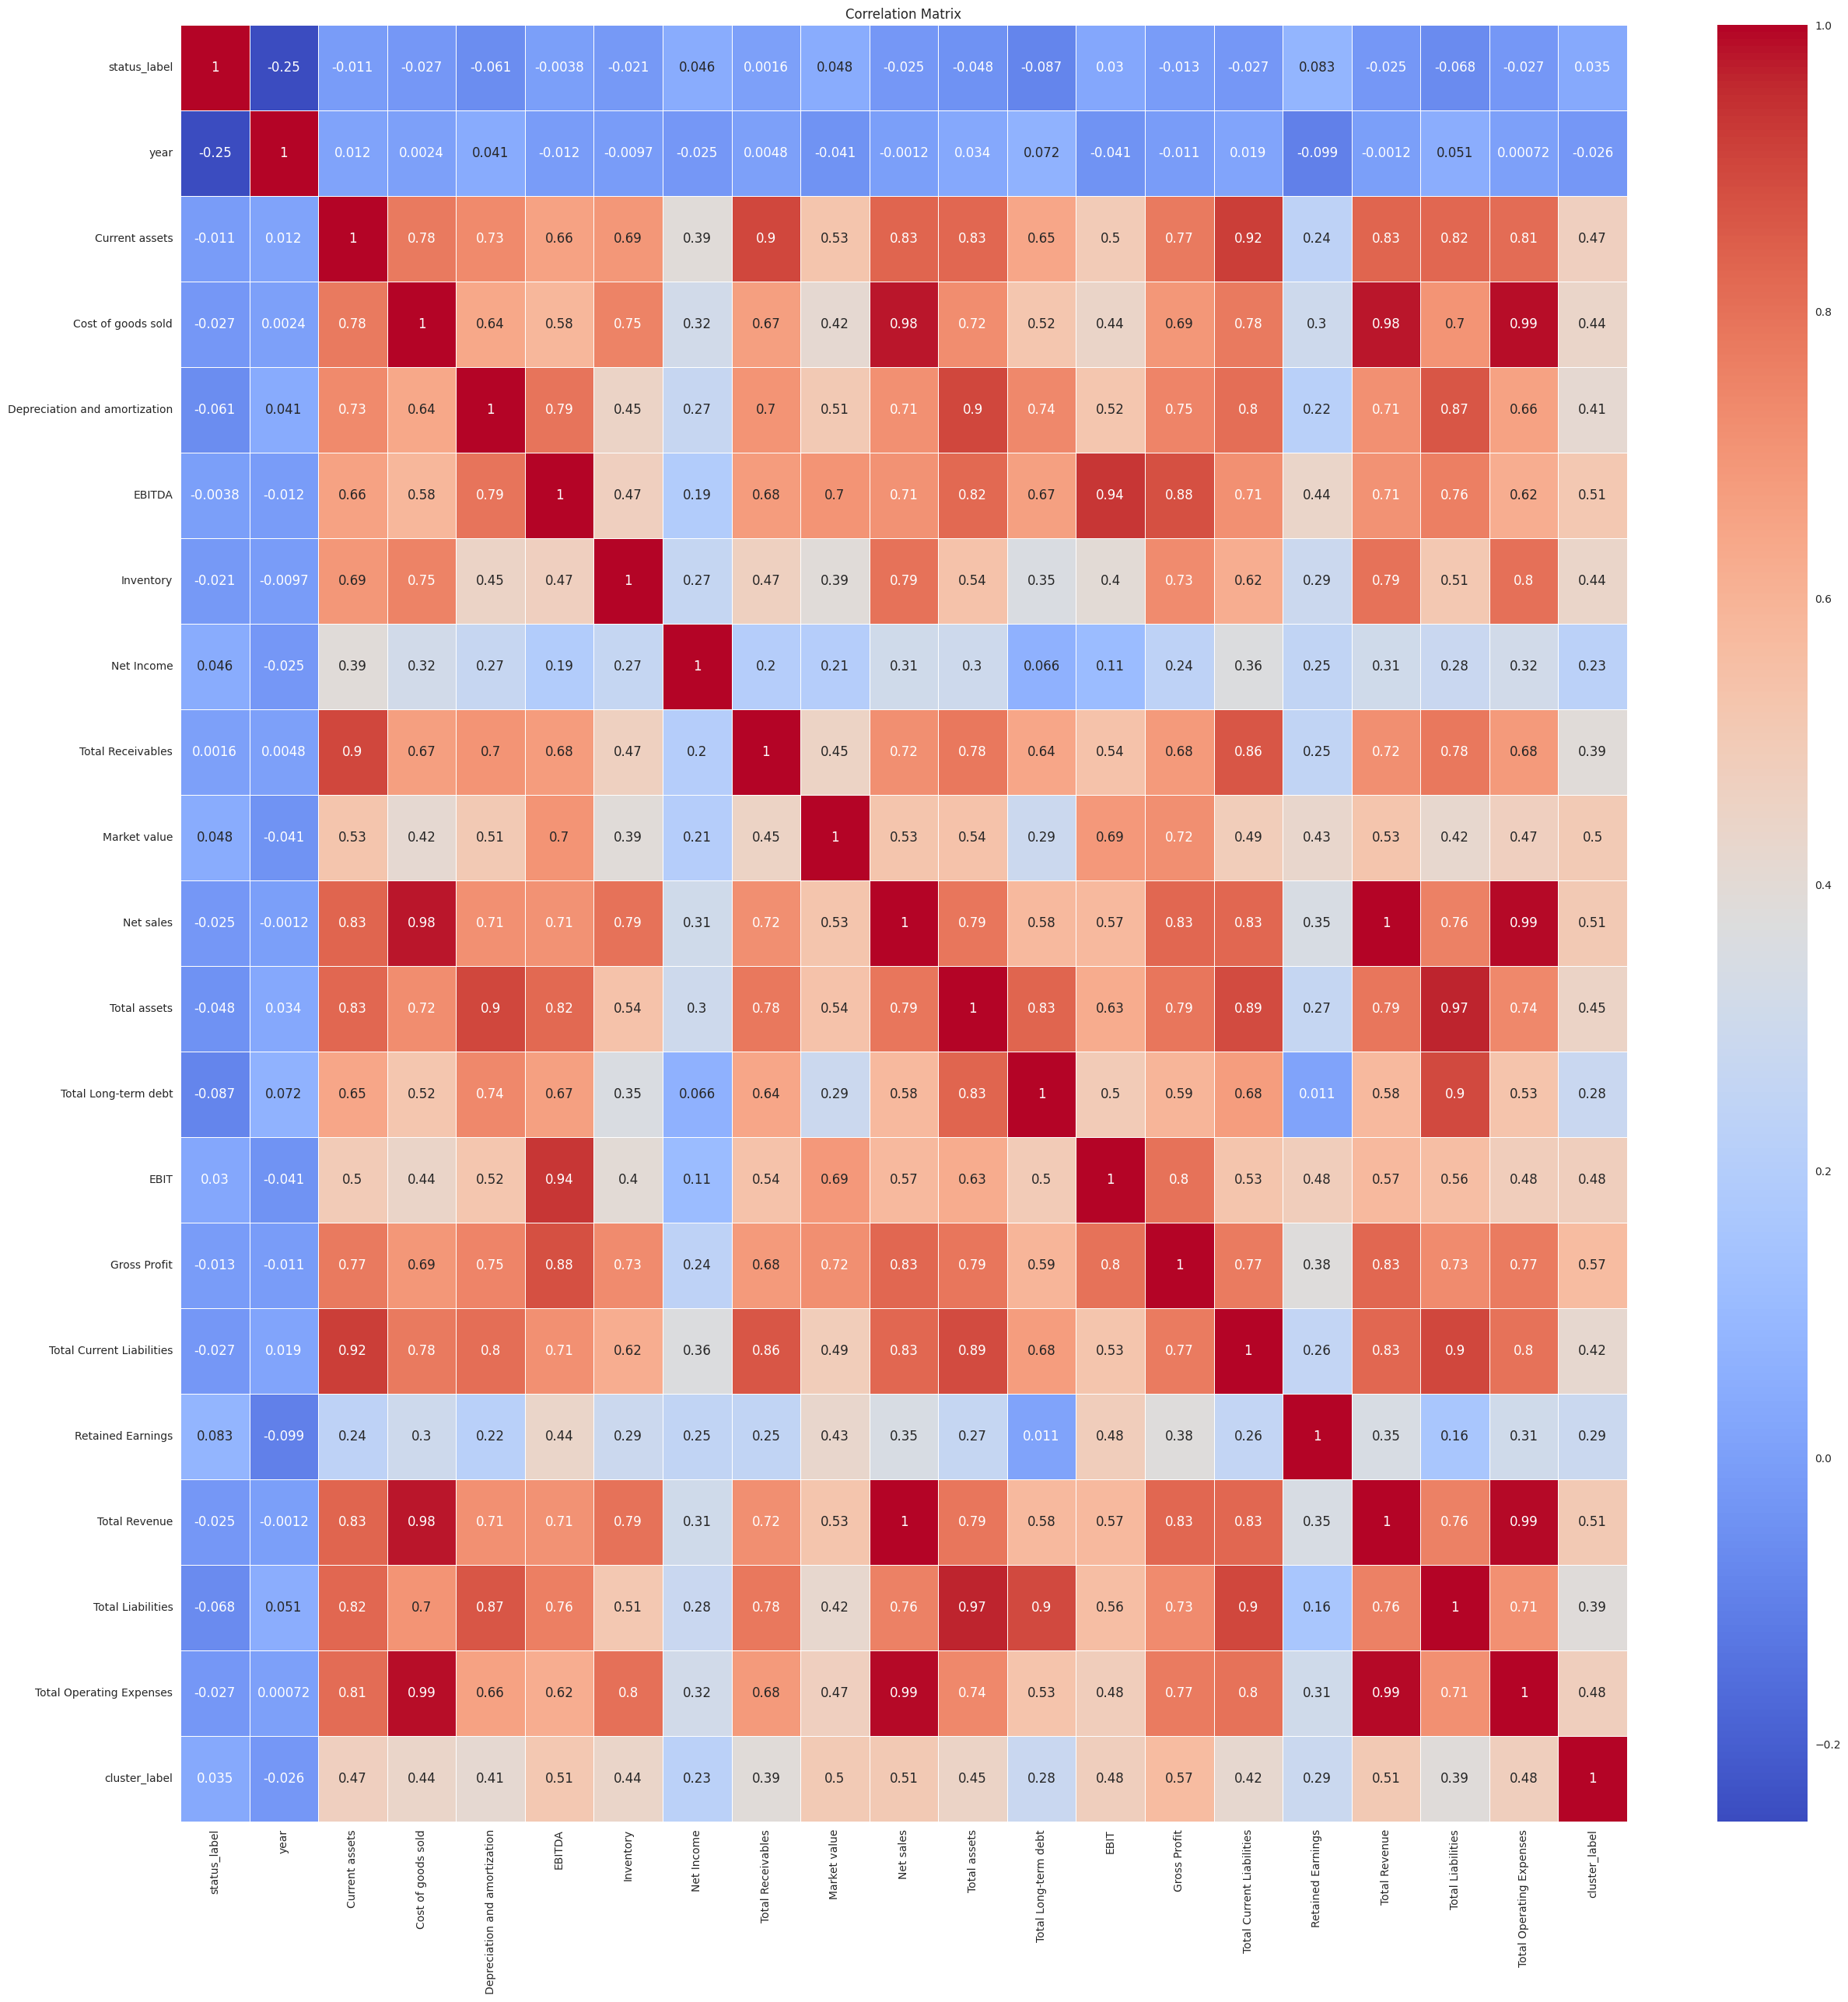

In [80]:
plt.figure(figsize=(30,30))
corr = all_companies.corr()


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5)
 
plt.title('Correlation Matrix')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0) 

plt.show()

In [105]:
has_negatives = all_companies.lt(0).any()

# has_negatives is a Series containing True/False for each column

# Print column names with negative values (optional)
if has_negatives.any():
  negative_cols = has_negatives[has_negatives].index.tolist()
  print("Columns with negative values:", negative_cols)

Columns with negative values: ['Cost of goods sold', 'EBITDA', 'Net Income', 'Net sales', 'EBIT', 'Gross Profit', 'Retained Earnings', 'Total Revenue', 'Total Operating Expenses']


Profitability Ratios:

* Net Profit Margin: (Net Income) / (Revenue) - Measures the percentage of revenue that is converted into profit.
* Return on Equity (ROE): (Net Income) / (Shareholder Equity) - Measures the return on investment for shareholders.
* Return on Assets (ROA): (Net Income) / (Total Assets) - Measures the efficiency of using assets to generate profit.
* Gross Profit Margin: (Gross Profit) / (Net Sales) - Measures the profit remaining after accounting for the cost of goods sold.
* Return on Sales (ROS): (Net Income) / (Net Sales) - Similar to Net Profit Margin, but expressed as a percentage.


Liquidity Ratios:

* Current Ratio: (Current Assets) / (Current Liabilities) - Measures a company's ability to pay off short-term liabilities with its current assets.
* Quick Ratio: (Current Assets - Inventory) / (Current Liabilities) - A more conservative measure of liquidity that excludes inventory from current assets.
* Cash Ratio: (Cash and Cash Equivalents) / (Current Liabilities) - The most stringent liquidity measure, indicating a company's ability to pay off short-term liabilities solely with cash.

Solvency Ratios:

* Debt-to-Equity Ratio: (Total Liabilities) / (Shareholder Equity) - Measures a company's financial leverage and its reliance on debt financing.
* Debt-to-Asset Ratio: (Total Liabilities) / (Total Assets) - Indicates the proportion of a company's assets financed by debt.

Activity Ratios:

* Inventory Turnover: (Cost of Goods Sold) / (Average Inventory) - Measures how efficiently a company is selling its inventory.
* Receivables Turnover: (Revenue) / (Average Accounts Receivable) - Measures how efficiently a company is collecting payments from customers.


Additional Ratios (if applicable):

* EBITDA Margin: (EBITDA) / (Revenue) - Earnings Before Interest, Taxes, Depreciation, and Amortization margin, a measure of profitability excluding non-cash expenses.
* Price-to-Earnings Ratio (P/E Ratio): (Stock Price) / (Earnings per Share) - A market valuation metric used to compare companies within the same industry.

In [115]:
all_companies.columns

Index(['status_label', 'year', 'Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Net sales', 'Total assets',
       'Total Long-term debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses', 'cluster_label',
       'Net Profit Margin', 'Gross Profit Margin', 'ROA', 'ROS',
       'Current Ratio', 'Quick Ratio', 'Debt to asset ratio'],
      dtype='object')

In [12]:
all_companies['Net Profit Margin']=all_companies['Net Income']/all_companies['Total Revenue']
all_companies['Gross Profit Margin']=all_companies['Gross Profit']/all_companies['Net sales']
all_companies['ROA']=all_companies['Net Income']/all_companies['Total assets']
all_companies['ROS']=all_companies['Net Income']/all_companies['Net sales']
all_companies['Current Ratio']=all_companies['Current assets']/all_companies['Total Current Liabilities']
all_companies['Quick Ratio']=(all_companies['Current assets']-all_companies['Inventory'])/all_companies['Total Current Liabilities']
all_companies['Debt to asset ratio']=all_companies['Total Liabilities']/all_companies['Total assets']


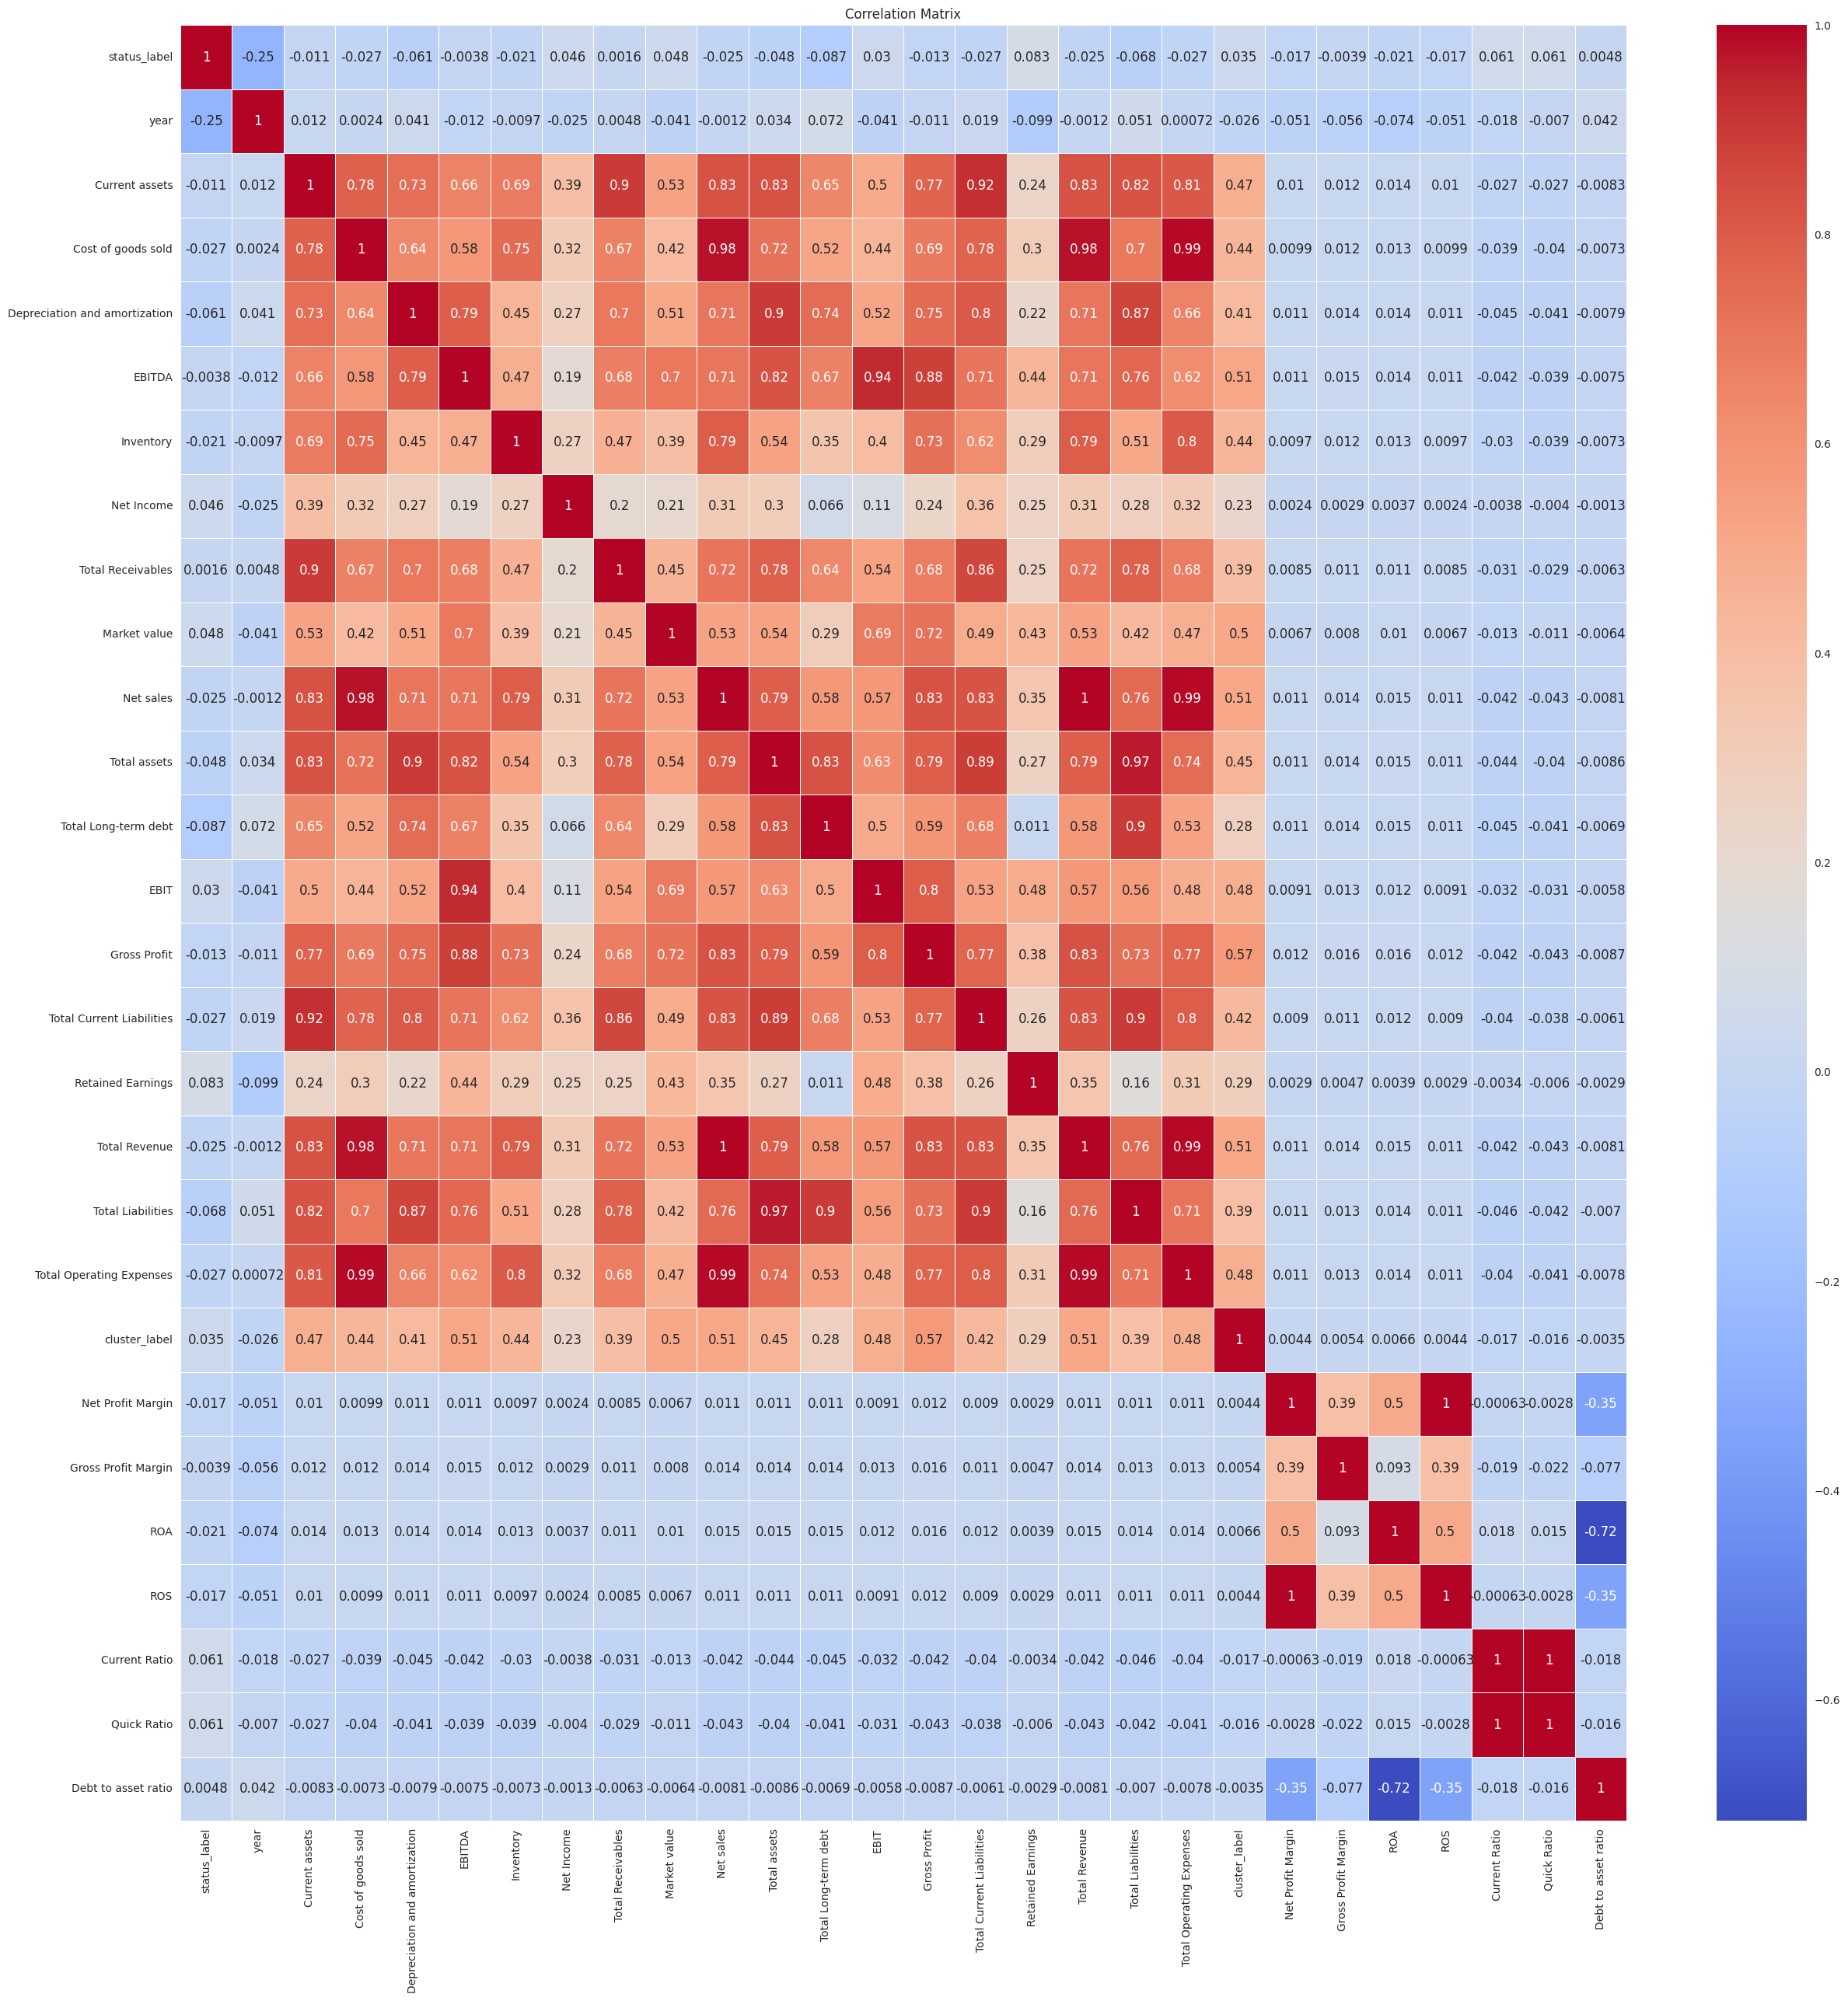

In [108]:
plt.figure(figsize=(30,30))
corr = all_companies.corr()


sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='coolwarm',
            annot=True,
            linewidths=.5)
 
plt.title('Correlation Matrix')
# plt.xticks(rotation=90)
# plt.yticks(rotation=0) 

plt.show()

In [16]:
all_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13582 entries, 0 to 13581
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   status_label                   13582 non-null  int64  
 1   year                           13582 non-null  int64  
 2   Current assets                 13582 non-null  float64
 3   Cost of goods sold             13582 non-null  float64
 4   Depreciation and amortization  13582 non-null  float64
 5   EBITDA                         13582 non-null  float64
 6   Inventory                      13582 non-null  float64
 7   Net Income                     13582 non-null  float64
 8   Total Receivables              13582 non-null  float64
 9   Market value                   13582 non-null  float64
 10  Net sales                      13582 non-null  float64
 11  Total assets                   13582 non-null  float64
 12  Total Long-term debt           13582 non-null 

TypeError: FigureBase.colorbar() missing 1 required positional argument: 'mappable'

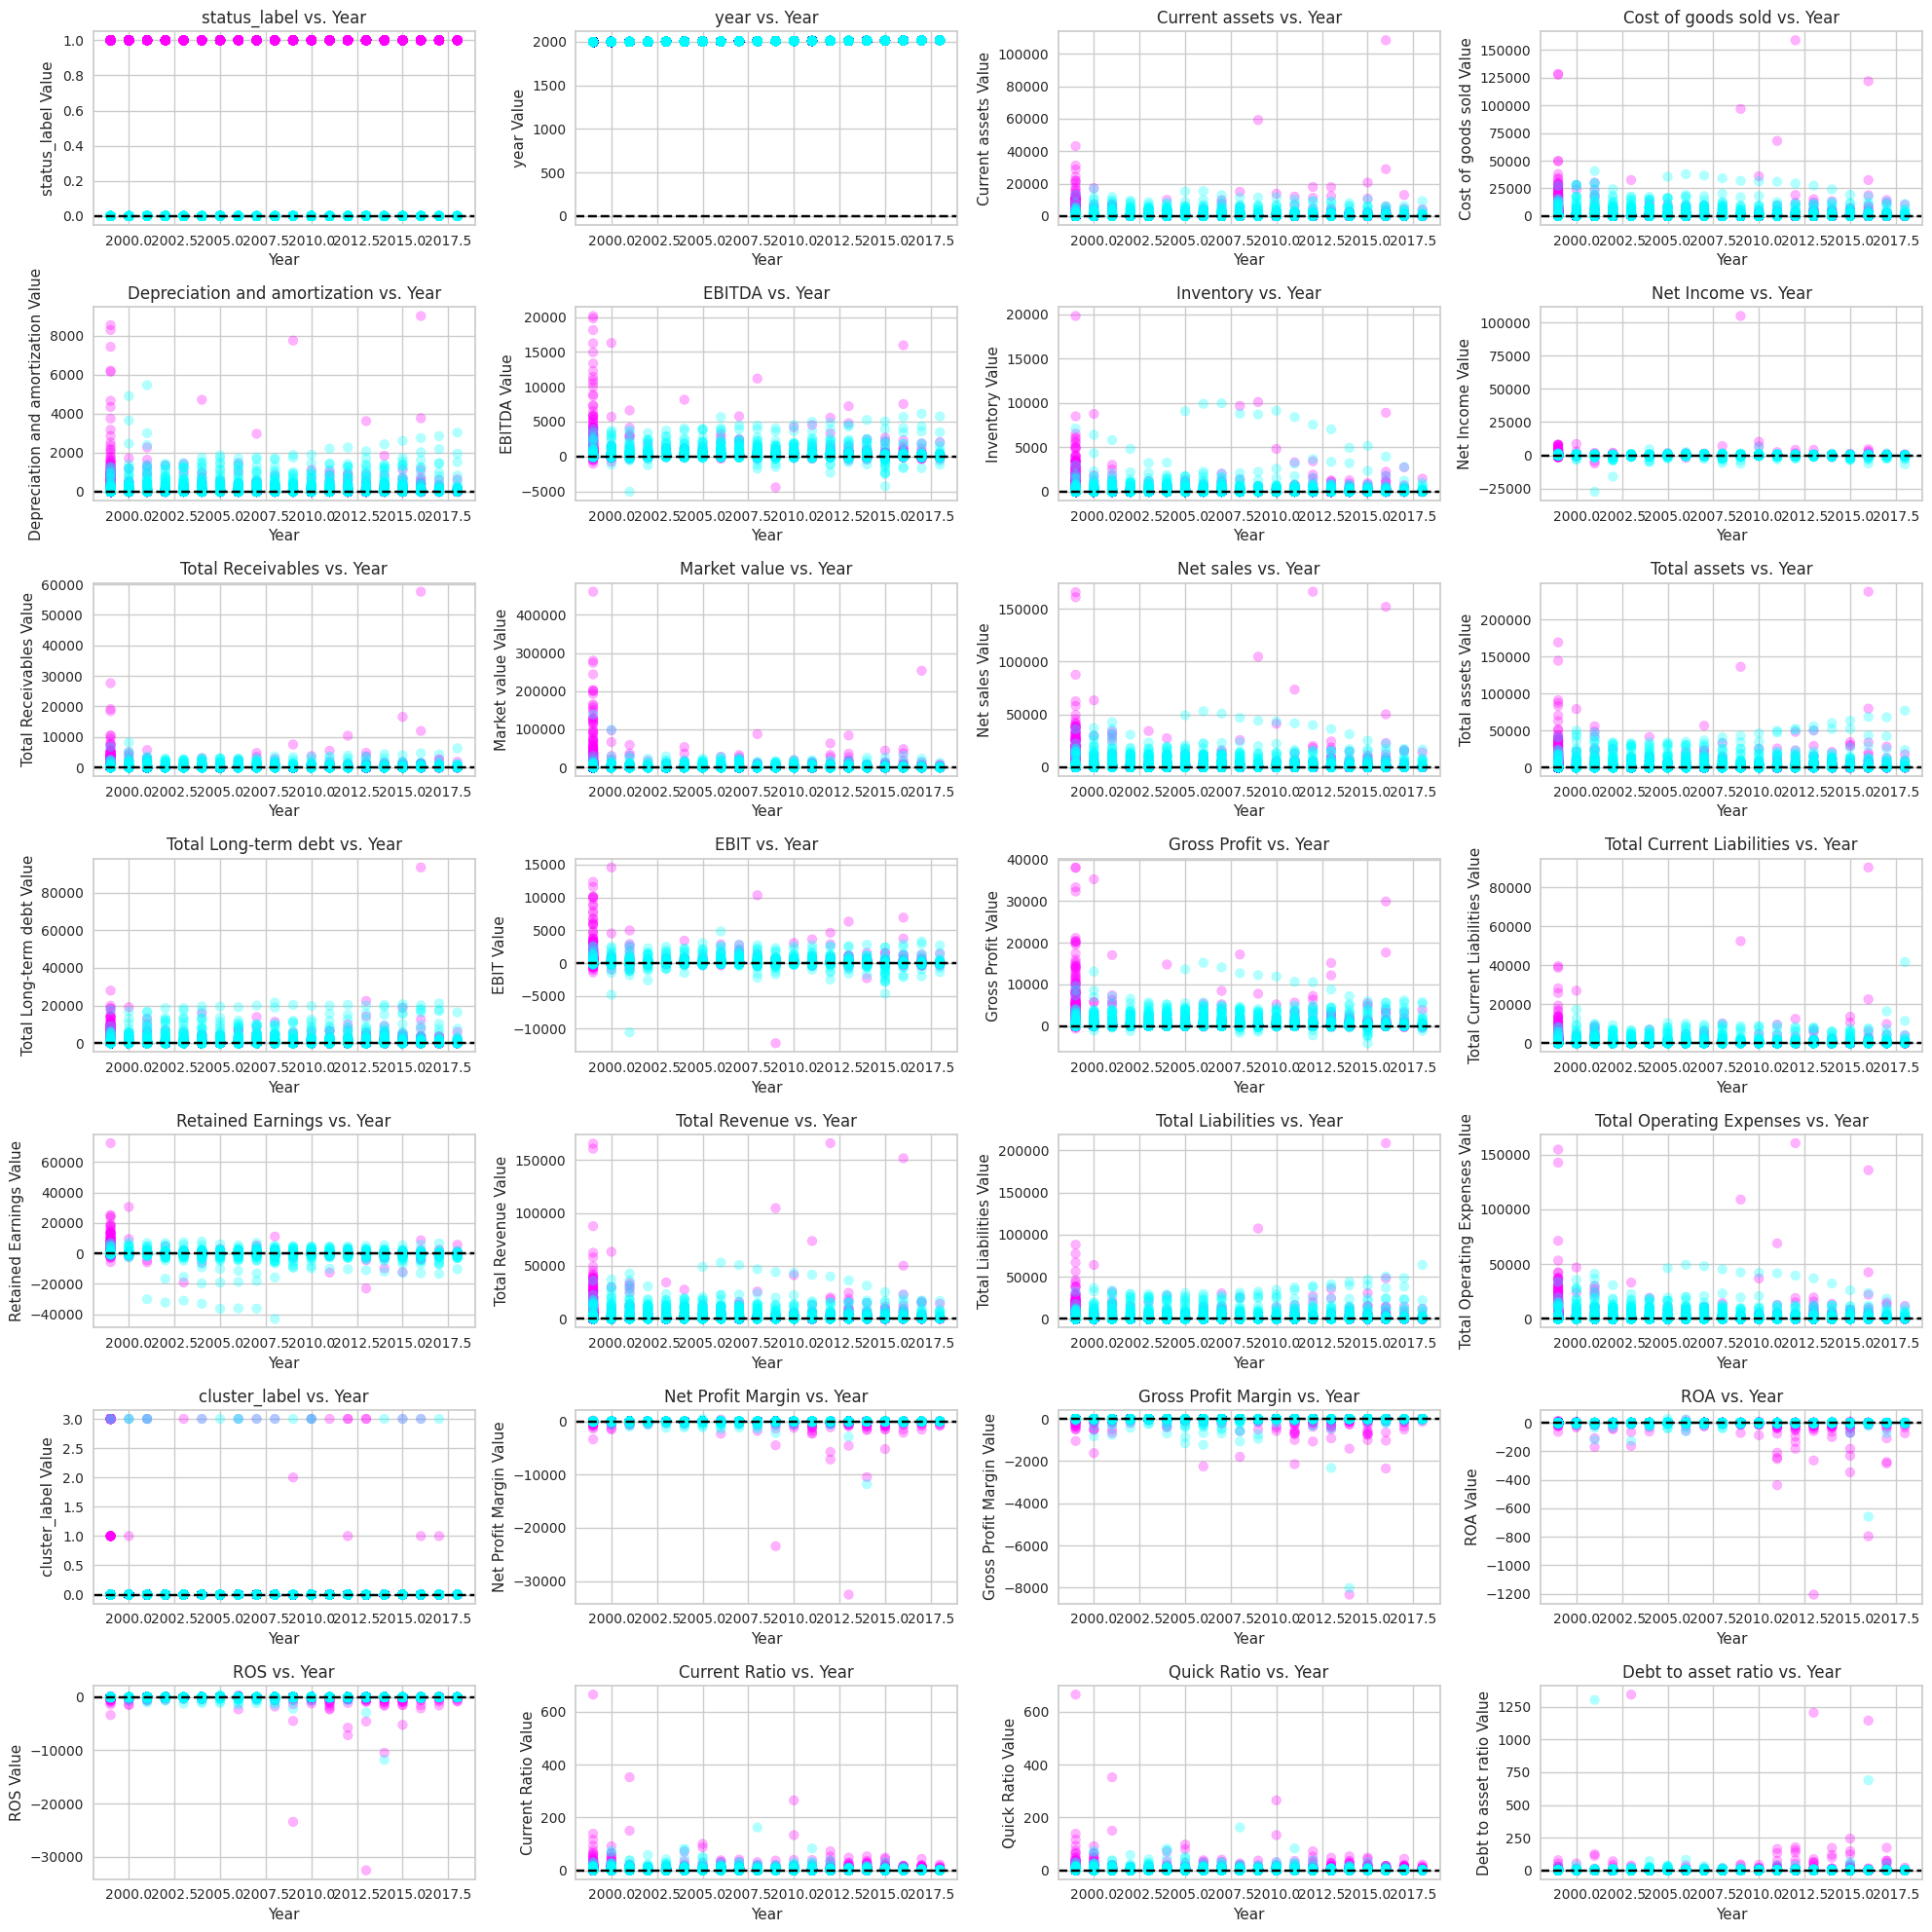

In [118]:
# Select all numerical features (replace 'numeric_features' with your actual list if needed)
numeric_features = [col for col in all_companies.columns if all_companies[col].dtype != object]

# Define number of rows and columns for the subplot grid (adjust based on your number of features)
n_rows = 7  # Adjust as needed
n_cols = 4  # Adjust as needed

# Create a figure and subplots using plt.subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Iterate through features and create scatter plots on subplots
feature_count = 0
for i in range(n_rows):
    for j in range(n_cols):
        if feature_count >= len(numeric_features):
            break  # No more features to plot, exit loop

        # Access the current subplot using axes[i, j]
        ax = axes[i, j]

        # Scatter plot on current subplot
        ax.scatter(all_companies['year'], all_companies[numeric_features[feature_count]], c=all_companies['status_label'], cmap='cool', alpha=0.3)

        # Add horizontal line at y=0
        ax.axhline(0, c='black', ls='--')

        # Feature label and title (optional)
        ax.set_xlabel('Year')
        ax.set_ylabel(numeric_features[feature_count] + ' Value')
        ax.set_title(numeric_features[feature_count] + ' vs. Year')

        feature_count += 1

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Colorbar for status_label (optional, position outside subplots)
# You can adjust the position using fig.colorbar(...,の位置)
fig.colorbar(label='Status Label', ax=axes.ravel())

# Show the plot
plt.show()

In [161]:
all_companies.columns

Index(['status_label', 'year', 'Current assets', 'Cost of goods sold',
       'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income',
       'Total Receivables', 'Market value', 'Net sales', 'Total assets',
       'Total Long-term debt', 'EBIT', 'Gross Profit',
       'Total Current Liabilities', 'Retained Earnings', 'Total Revenue',
       'Total Liabilities', 'Total Operating Expenses', 'cluster_label',
       'Net Profit Margin', 'Gross Profit Margin', 'ROA', 'ROS',
       'Current Ratio', 'Quick Ratio', 'Debt to asset ratio'],
      dtype='object')

# model training and results

In [13]:
x = all_companies.drop(["status_label"] , axis = 1).values
# ,'cluster_label','Net sales','Current Ratio','Quick Ratio','Debt to asset ratio','Total Long-term debt','Total Receivables','Market value','Gross Profit'
#                        ,'EBIT','Total Revenue','Net Profit Margin','Gross Profit Margin','Cost of goods sold'
# x=X.drop(['status_label'],axis=1).values
y = all_companies["status_label"].values
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.25 , random_state= 42)

In [14]:
from sklearn.feature_selection import f_classif
feature_names=all_companies.drop(columns=['status_label']).columns
# Create f_classif object to calculate F-value
f_value = f_classif(x, y)

# Print the name and F-value of each feature
for feature in zip(feature_names, f_value[0]):
    print(feature)

('year', 938.6192321797263)
('Current assets', 1.6514233810870846)
('Cost of goods sold', 10.056616713116005)
('Depreciation and amortization', 50.250513891317766)
('EBITDA', 0.1996249898004283)
('Inventory', 6.107372358411886)
('Net Income', 28.824041190561317)
('Total Receivables', 0.033021958181573524)
('Market value', 31.20395935915717)
('Net sales', 8.514672674743382)
('Total assets', 31.084017455008446)
('Total Long-term debt', 104.4484346783147)
('EBIT', 12.068226275388712)
('Gross Profit', 2.396417338580265)
('Total Current Liabilities', 10.058874747370249)
('Retained Earnings', 93.74100931036725)
('Total Revenue', 8.514672674743382)
('Total Liabilities', 62.830771153058464)
('Total Operating Expenses', 10.028225274242898)
('Net Profit Margin', 3.8474626761390436)
('Gross Profit Margin', 0.20340287948023625)
('ROA', 5.961637347003655)
('ROS', 3.8474626761390436)
('Current Ratio', 50.860228985985486)
('Quick Ratio', 51.11151827191108)
('Debt to asset ratio', 0.31830402481094083)

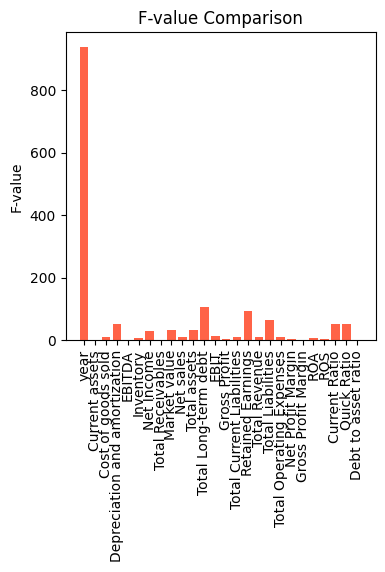

In [15]:
# Create a bar chart for visualizing the F-values
plt.figure(figsize=(4,4))
plt.bar(x=feature_names, height=f_value[0], color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('F-value')
plt.title('F-value Comparison')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [46]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
for i in range (1,10,2):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train_scaled,y_train)
  predict = neigh.predict(x_test_scaled)
  print("classification report of k= ", i)
  print(classification_report(predict,y_test))

classification report of k=  1
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1299
           1       0.82      0.82      0.82      2097

    accuracy                           0.78      3396
   macro avg       0.76      0.76      0.76      3396
weighted avg       0.78      0.78      0.78      3396

classification report of k=  3
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1233
           1       0.86      0.83      0.84      2163

    accuracy                           0.80      3396
   macro avg       0.79      0.79      0.79      3396
weighted avg       0.81      0.80      0.80      3396

classification report of k=  5
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1201
           1       0.87      0.83      0.85      2195

    accuracy                           0.81      3396
   macro avg       0.79      0.80  

In [45]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

# Fit the model
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

cr = classification_report(y_test, y_pred)
print("\n\nClassification Report\n")
print(cr)



Classification Report

              precision    recall  f1-score   support

           0       0.38      0.94      0.55      1307
           1       0.60      0.06      0.10      2089

    accuracy                           0.40      3396
   macro avg       0.49      0.50      0.32      3396
weighted avg       0.52      0.40      0.27      3396



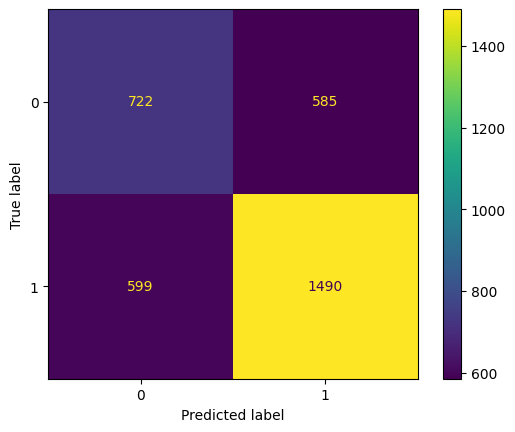

In [39]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
linear_clf = SGDClassifier(class_weight='balanced')

# Train the classifier using fit() function
linear_clf.fit(x_train_scaled, y_train)

y_test_pred = linear_clf.predict(x_test_scaled)
cm=metrics.confusion_matrix(y_test,y_test_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [40]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1321
           1       0.71      0.72      0.72      2075

    accuracy                           0.65      3396
   macro avg       0.63      0.63      0.63      3396
weighted avg       0.65      0.65      0.65      3396



In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=42,class_weight='balanced',)
param_grid = { 
    'max_features': [ 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy','log_loss']
}
CV_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv= 5)
CV_dt.fit(x_train, y_train)
print(CV_dt.best_params_)
accuracy = CV_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(classification_report(y_test,CV_dt.best_estimator_.predict(x_test)))

{'criterion': 'gini', 'max_features': 'sqrt'}
Accuracy for our training dataset with tuning is : 76.70%
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1307
           1       0.81      0.81      0.81      2089

    accuracy                           0.76      3396
   macro avg       0.75      0.75      0.75      3396
weighted avg       0.76      0.76      0.76      3396



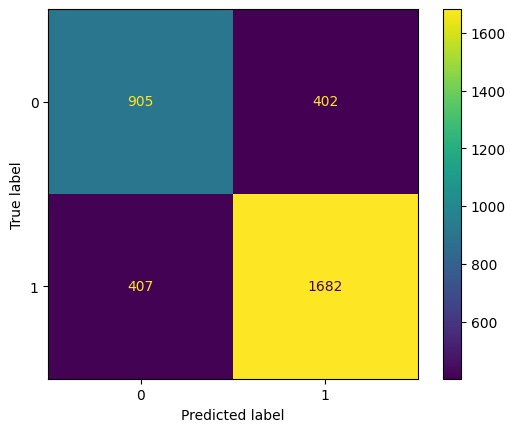

In [42]:
cm=metrics.confusion_matrix(y_test,CV_dt.best_estimator_.predict(x_test))
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l2"],'solver':['newton-cg', 'lbfgs']}# l1 lasso l2 ridge
logreg=LogisticRegression(random_state=42,max_iter=10000)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(x_train_scaled,y_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
logregAccuracy = logreg_cv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(logregAccuracy) )
print(classification_report(y_test,logreg_cv.best_estimator_.predict(x_test_scaled)))

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for our training dataset with tuning is : 63.17%
              precision    recall  f1-score   support

           0       0.54      0.32      0.40      1307
           1       0.66      0.83      0.74      2089

    accuracy                           0.63      3396
   macro avg       0.60      0.57      0.57      3396
weighted avg       0.61      0.63      0.61      3396



In [51]:
from xgboost import XGBClassifier
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}

XGB_model = XGBClassifier(seed=42)
xgbcv=GridSearchCV(estimator=XGB_model,param_grid=params,cv=5)
xgbcv.fit(x_train, y_train)

print(xgbcv.best_params_)
accuracy = xgbcv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(classification_report(y_test,xgbcv.best_estimator_.predict(x_test)))

{'learning_rate': 0.05, 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 86.55%
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1307
           1       0.88      0.91      0.89      2089

    accuracy                           0.87      3396
   macro avg       0.86      0.86      0.86      3396
weighted avg       0.87      0.87      0.87      3396



In [21]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier(seed=42,n_estimators=1000,learning_rate=0.05)
XGB_model.fit(x_train, y_train)
print(classification_report(y_test,XGB_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1307
           1       0.88      0.91      0.89      2089

    accuracy                           0.87      3396
   macro avg       0.86      0.86      0.86      3396
weighted avg       0.87      0.87      0.87      3396



In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100,200, 500],
    'max_features': [ 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
print(CV_rfc.best_params_)
accuracy = CV_rfc.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(classification_report(y_test,CV_rfc.best_estimator_.predict(x_test)))

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 86.45%
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1307
           1       0.88      0.90      0.89      2089

    accuracy                           0.86      3396
   macro avg       0.86      0.85      0.86      3396
weighted avg       0.86      0.86      0.86      3396



In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': ['scale','auto'],
              'kernel': ['rbf','linear']} 
              # ,'linear','sigmoid'
  
grid = GridSearchCV(SVC(random_state=42,class_weight='balanced',), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.694 total time=   5.8s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.691 total time=   5.6s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.696 total time=   5.6s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.698 total time=   5.5s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.691 total time=   5.4s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.655 total time=   5.4s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.648 total time=   5.7s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.661 total time=   5.1s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.654 total time=   4.9s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.646 total time=   5.7s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.698 total time=   5.7s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

In [ ]:
print(grid.best_params_)
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(classification_report(y_test,grid.best_estimator_.predict(x_test_scaled)))

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(random_state=42)
params = { 
    'n_estimators': [100,200, 500],
    'learning_rate': [0.1, 0.01, 0.05]
}
adacv=GridSearchCV(estimator=ada,param_grid=params,cv=5)
adacv.fit(x_train, y_train)
print(adacv.best_params_)
accuracy = adacv.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(classification_report(y_test,adacv.best_estimator_.predict(x_test)))

{'learning_rate': 0.1, 'n_estimators': 500}
Accuracy for our training dataset with tuning is : 83.30%
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1307
           1       0.88      0.86      0.87      2089

    accuracy                           0.84      3396
   macro avg       0.83      0.83      0.83      3396
weighted avg       0.84      0.84      0.84      3396

